In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
raw_data = pd.read_csv("../data/train.csv")

In [3]:
# Have Jupyter show 100 rows of data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# For initial investigation of information provided
raw_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

##### Id and PID seem to just be indexes for recordkeeping purposes and are not useful in predicting SalePrice. Removing them as part of preprocessing.

In [5]:
# Dropping the Id and PID columns
raw_data.drop(columns = ['Id','PID'], inplace = True)
raw_data.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

### Investigating the Missing Values

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     1721 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            140 non-null    object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [7]:
# Noticed that MS SubClass values are shown as integers but should be categorical, need to change to string
raw_data = raw_data.astype({'MS SubClass': str}, errors = 'raise')

# To check
raw_data['MS SubClass'].dtype
# Results show that it is now an object data type

dtype('O')

In [8]:
# Mo Sold (Month Sold) variable should be made into a categorical variable as it make more contextual meaning.
Mo_Sold_mapping = {1 : 'Jan', 2 : 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct',
                  11: 'Nov', 12: 'Dec'}
raw_data['Mo Sold'] = raw_data['Mo Sold'].replace(Mo_Sold_mapping)

# To check
raw_data['Mo Sold'].dtype

dtype('O')

In [9]:
# Noticed that Overall Qual values are shown as integers but should be categorical, need to change to string
raw_data = raw_data.astype({'Overall Qual': str}, errors = 'raise')

# To check
raw_data['Overall Qual'].dtype
# Results show that it is now an object data type

dtype('O')

In [10]:
# Noticed that Overall Cond values are shown as integers but should be categorical, need to change to string
raw_data = raw_data.astype({'Overall Cond': str}, errors = 'raise')

# To check
raw_data['Overall Cond'].dtype
# Results show that it is now an object data type

dtype('O')

# Attempting some feature engineering

In [11]:
# Transforming Year Built, Year Remod/Add, and Garage Yr Blt to PropertyAge, PropertyModAge, and GarageAge, respectively.
# This is done by deducting from Yr Sold the respective columns.
# However, due to missing values in Garage Yr Blt, that column will be made after missing values are imputed.
raw_data['PropertyAge'] = raw_data['Yr Sold'] - raw_data['Year Built']
raw_data['PropertyModAge'] = raw_data['Yr Sold'] - raw_data['Year Remod/Add']
raw_data.drop(columns = ['Year Built', 'Year Remod/Add'], inplace = True)

In [12]:
# This is done on hindsight, and the Cross Val RSME reduced from 30,000+ to 26,548
raw_data['Gr Liv Area2'] = raw_data['Gr Liv Area']**2
raw_data['Total Bsmt SF2'] = raw_data['Total Bsmt SF']**2
#raw_data = raw_data.drop(columns = ['Gr Liv Area2','Total Bsmt SF2'])

In [13]:
cat_var = []
for feature in raw_data:
    if raw_data[feature].dtype == object:
        cat_var.append(feature)
    else:
        pass


len(cat_var)

46

In [14]:
num_var = []
for feature in raw_data:
    if raw_data[feature].dtype != object:
        num_var.append(feature)
    else:
        pass
    
len(num_var)

35

In [15]:
num_of_missing_val = pd.DataFrame(raw_data.isna().sum())

# Renaming the column name from 0 to 'Missing_Count'
num_of_missing_val = num_of_missing_val.rename(columns={0: 'Missing_Count'})

# Sorting in descending order
num_of_missing_val = num_of_missing_val.sort_values(by = 'Missing_Count', ascending = False)

# Filtering features with missing values
num_of_missing_val = num_of_missing_val.loc[num_of_missing_val['Missing_Count']!= 0,:]
print(num_of_missing_val)

# To retrieve number of features with missing values
print(num_of_missing_val.shape)

                Missing_Count
Pool QC                  2042
Misc Feature             1986
Alley                    1911
Fence                    1651
Fireplace Qu             1000
Lot Frontage              330
Garage Yr Blt             114
Garage Finish             114
Garage Cond               114
Garage Qual               114
Garage Type               113
Bsmt Exposure              58
BsmtFin Type 2             56
BsmtFin Type 1             55
Bsmt Cond                  55
Bsmt Qual                  55
Mas Vnr Type               22
Mas Vnr Area               22
Bsmt Full Bath              2
Bsmt Half Bath              2
Total Bsmt SF               1
Garage Area                 1
Bsmt Unf SF                 1
BsmtFin SF 2                1
Garage Cars                 1
BsmtFin SF 1                1
Total Bsmt SF2              1
(27, 1)


##### It can be observed that there are 26 columns with missing values.

In [16]:
# Dropping observations with missing values in columns with only one or two missing value to streamline subsequent data cleaning

raw_data = raw_data.dropna(how = 'any',
                           subset = ['Garage Area', 'Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1', 'Bsmt Full Bath', 'Bsmt Half Bath'])

# Now checking the updated dataset

num_of_missing_val1 = pd.DataFrame(raw_data.isna().sum())

# Renaming the column name from 0 to 'Missing_Count'
num_of_missing_val1 = num_of_missing_val1.rename(columns={0: 'Missing_Count'})

# Filtering features with missing values
num_of_missing_val1 = num_of_missing_val1.loc[num_of_missing_val1['Missing_Count']!= 0,:]
print(num_of_missing_val1)

# Sorting in descending order
num_of_missing_val1 = num_of_missing_val1.sort_values(by = 'Missing_Count', ascending = False)

# To retrieve number of features with missing values
print(num_of_missing_val1.shape)
print(raw_data.shape)

                Missing_Count
Lot Frontage              330
Alley                    1908
Mas Vnr Type               22
Mas Vnr Area               22
Bsmt Qual                  53
Bsmt Cond                  53
Bsmt Exposure              56
BsmtFin Type 1             53
BsmtFin Type 2             54
Fireplace Qu              998
Garage Type               113
Garage Yr Blt             113
Garage Finish             113
Garage Qual               113
Garage Cond               113
Pool QC                  2039
Fence                    1650
Misc Feature             1983
(18, 1)
(2048, 81)


##### After removing those 3 rows, total observations are reduced from 2051 to 2048, and there are 18 remaining columns with missing values.

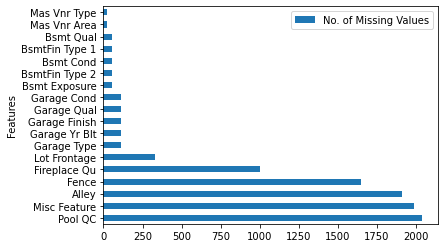

In [17]:
# Plotting the number of missing values of each 
df1 = pd.DataFrame({'Features':num_of_missing_val1.index, 'No. of Missing Values':num_of_missing_val1['Missing_Count']})
ax = df1.plot.barh(x = 'Features', y = 'No. of Missing Values')

In [18]:
high_missing_val = num_of_missing_val.loc[num_of_missing_val['Missing_Count'] >= 0.8 * 2048]
high_missing_val

,Missing_Count
Pool QC,2042
Misc Feature,1986
Alley,1911
Fence,1651


##### It can be observed that Pool QC (Pool Quality), Misc Feature, Alley, and Fence are the 4 variables with the most missing values, each with at least 80% (1639) missing values.

In [19]:
# Removing the 4 features
raw_data = raw_data.drop(columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence'])

In [20]:
num_of_missing_val2 = pd.DataFrame(raw_data.isna().sum())

# Renaming the column name from 0 to 'Missing_Count'
num_of_missing_val2 = num_of_missing_val2.rename(columns={0: 'Missing_Count'})

# Sorting in descending order
num_of_missing_val2 = num_of_missing_val2.sort_values(by = 'Missing_Count', ascending = False)

# Filtering features with missing values
num_of_missing_val2 = num_of_missing_val2.loc[num_of_missing_val2['Missing_Count']!= 0,:]
print(num_of_missing_val2)

# To retrieve number of features with missing values
print(num_of_missing_val2.shape)
print(raw_data.shape)

                Missing_Count
Fireplace Qu              998
Lot Frontage              330
Garage Finish             113
Garage Yr Blt             113
Garage Qual               113
Garage Cond               113
Garage Type               113
Bsmt Exposure              56
BsmtFin Type 2             54
Bsmt Qual                  53
Bsmt Cond                  53
BsmtFin Type 1             53
Mas Vnr Type               22
Mas Vnr Area               22
(14, 1)
(2048, 77)


##### Given the large proportion of observations having missing values, these 4 features are dropped. This leaves us with 75 remaining features.

##### Before plotting the correlation matrix, there is a need to address missing data, especially for the numerical variables.

##### Before addressing missing data, the dataset has the following categorical and numerical variables.

In [21]:
# Seperating dataset into numerical and categorical variables
cat_var = []
for feature in raw_data:
    if raw_data[feature].dtype == object:
        cat_var.append(feature)
    else:
        pass
print(cat_var)
print(len(cat_var))

['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Mo Sold', 'Sale Type']
42


In [22]:
num_var = []
for feature in raw_data:
    if raw_data[feature].dtype != object:
        num_var.append(feature)
    else:
        pass
print(num_var)
print(len(num_var))

['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Yr Sold', 'SalePrice', 'PropertyAge', 'PropertyModAge', 'Gr Liv Area2', 'Total Bsmt SF2']
35


##### The lengths of numerical and categorical variables are 38 and 37 respectively, and add up to 75, which is the right number of columns.

##### Over here, attempted to Impute missing numerical data using Linear Regression. Will be using 2 numerical variables with no missing data, have the highest correlation with the target variable with missing values, and have minimal correlation with each other.

In [23]:
# # Imputing for Lot Frontage using linear regression

#model = LinearRegression()

# df_Lot_Frontage = raw_data[['Lot Frontage','Lot Area','BsmtFin SF 1']]
# df_Lot_Frontage_no_null = raw_data.loc[raw_data['Lot Frontage'].notnull(),['Lot Frontage','Lot Area','BsmtFin SF 1']]

# X_col = df_Lot_Frontage_no_null[['Lot Area','BsmtFin SF 1']]
# impute_col = df_Lot_Frontage_no_null['Lot Frontage']

# model.fit(X = X_col, y = impute_col)
# missing_id_lot_frontage = df_Lot_Frontage.index[df_Lot_Frontage['Lot Frontage'].isnull()]

# df_Lot_Frontage['imputed Lot Frontage'] = [df_Lot_Frontage.loc[i,'Lot Frontage'] if i not in missing_id_lot_frontage
#     # If not, it means there is a missing age value and hence fill in those missing values based on regression results
#      else model.predict(pd.DataFrame(df_Lot_Frontage.loc[i,['Lot Area','BsmtFin SF 1']]).T)[0]
#      for i in range(df_Lot_Frontage.shape[0])]

In [24]:
# Imputing for Lot Frontage using IterativeImputer

it_imp = IterativeImputer()
Lot_Frontage_missing = raw_data.loc[:,['Lot Frontage','Lot Area','BsmtFin SF 1']]
it_imp_Lot_Frontage = it_imp.fit_transform(Lot_Frontage_missing)
it_imp_Lot_Frontage = pd.DataFrame(it_imp_Lot_Frontage, columns = Lot_Frontage_missing.columns)
Lot_Frontage_missing.head()

# Despite using Iterative Imputer, the first value of Lot Frontage is not imputed

,Lot Frontage,Lot Area,BsmtFin SF 1
0,NaN,13517,533.0
1,43.0,11492,637.0
2,68.0,7922,731.0
3,73.0,9802,0.0
4,82.0,14235,0.0


### Due to unknown error in imputing numerical values using both Linear Regression and IterativeImputer, imputing missing values using mean

In [25]:
# Imputing missing values of Lot Frontage
raw_data['Lot Frontage'].fillna(value = round(raw_data['Lot Frontage'].mean()), inplace = True)

# Imputing missing values of Garage Yr Blt
raw_data['Garage Yr Blt'].fillna(value = round(raw_data['Garage Yr Blt'].mean()), inplace = True)

# Imputing missing values of Mas Vnr Area
raw_data['Mas Vnr Area'].fillna(value = round(raw_data['Mas Vnr Area'].mean()), inplace = True)

# Imputing missing values of Bsmt Full Bath
raw_data['Bsmt Full Bath'].fillna(value = round(raw_data['Bsmt Full Bath'].mean()), inplace = True)

# Imputing missing values of Bsmt Half Bath
raw_data['Bsmt Half Bath'].fillna(value = round(raw_data['Bsmt Half Bath'].mean()), inplace = True)

# Imputing missing values of Garage Area
raw_data['Garage Area'].fillna(value = round(raw_data['Garage Area'].mean()), inplace = True)

# Imputing missing values of Garage Cars
raw_data['Garage Cars'].fillna(value = round(raw_data['Garage Cars'].mean()), inplace = True)

# Imputing missing values of Total Bsmt SF
raw_data['Total Bsmt SF'].fillna(value = round(raw_data['Total Bsmt SF'].mean()), inplace = True)

# Imputing missing values of Bsmt Unf SF
raw_data['Bsmt Unf SF'].fillna(value = round(raw_data['Bsmt Unf SF'].mean()), inplace = True)

# Imputing missing values of Total Bsmt SF
raw_data['Total Bsmt SF'].fillna(value = round(raw_data['Total Bsmt SF'].mean()), inplace = True)

# Imputing missing values of BsmtFin SF 2
raw_data['BsmtFin SF 2'].fillna(value = round(raw_data['BsmtFin SF 2'].mean()), inplace = True)

# Imputing missing values of BsmtFin SF 1
raw_data['BsmtFin SF 1'].fillna(value = round(raw_data['BsmtFin SF 1'].mean()), inplace = True)

In [26]:
num_data = raw_data[num_var]
num_data.isna().sum()

Lot Frontage       0
Lot Area           0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Yr Sold            0
SalePrice          0
PropertyAge        0
PropertyModAge     0
Gr Liv Area2       0
Total Bsmt SF2     0
dtype: int64

In [27]:
# Now that the Garage Yr Blt missing values addressed, can create the GarageAge column
raw_data['GarageAge'] = raw_data['Yr Sold'] - raw_data['Garage Yr Blt']
raw_data = raw_data.drop(columns = ['Garage Yr Blt'])

In [28]:
raw_data.shape

(2048, 77)

##### It can be observed that the numerical variables have been imputed correctly.

In [29]:
# Checking if missing values for numerical variables have been imputed successfully
updated_num_missing_val = pd.DataFrame(raw_data.isna().sum())
updated_num_missing_val = updated_num_missing_val.rename(columns={0: 'Missing_Count'})

# Sorting in descending order
updated_num_missing_val = updated_num_missing_val.sort_values(by = 'Missing_Count', ascending = False)

# Filtering features with missing values
updated_num_missing_val = updated_num_missing_val.loc[updated_num_missing_val['Missing_Count']!= 0,:]
print(updated_num_missing_val)
print(updated_num_missing_val.shape)

                Missing_Count
Fireplace Qu              998
Garage Finish             113
Garage Qual               113
Garage Cond               113
Garage Type               113
Bsmt Exposure              56
BsmtFin Type 2             54
BsmtFin Type 1             53
Bsmt Qual                  53
Bsmt Cond                  53
Mas Vnr Type               22
(11, 1)


##### As confirmed above, the remaining missing values to address are categorical variables.

In [30]:
# Need to retrieve the subset for categorical variables
cat_data = raw_data[cat_var]

# Number of missing values for categorical variables before the imputation
missing_cat_val = pd.DataFrame(cat_data.isna().sum())
num_of_missing_cat_val = missing_cat_val.rename(columns={0: 'Missing_Count'})

# Sorting in descending order
num_of_missing_cat_val = num_of_missing_cat_val.sort_values(by = 'Missing_Count', ascending = False)

# Filtering features with missing values
num_of_missing_cat_val = num_of_missing_cat_val.loc[num_of_missing_cat_val['Missing_Count']!= 0,:]
print(num_of_missing_cat_val)

# To retrieve number of features with missing values
print(num_of_missing_cat_val.shape)

                Missing_Count
Fireplace Qu              998
Garage Cond               113
Garage Qual               113
Garage Finish             113
Garage Type               113
Bsmt Exposure              56
BsmtFin Type 2             54
Bsmt Qual                  53
Bsmt Cond                  53
BsmtFin Type 1             53
Mas Vnr Type               22
(11, 1)


##### Subsetting only categorical variables and counting the number of missing values, they match the count above, confirming that the remaining missing values are from categorical variables.

##### Impute missing categorical variable using mode.

In [31]:
# Filling in missing values of the main dataset with the mode of the corresponding columns
raw_data['Fireplace Qu'] = raw_data['Fireplace Qu'].fillna(raw_data['Fireplace Qu'].mode()[0])
raw_data['Garage Cond'] = raw_data['Garage Cond'].fillna(raw_data['Garage Cond'].mode()[0])
raw_data['Garage Qual'] = raw_data['Garage Qual'].fillna(raw_data['Garage Qual'].mode()[0])
raw_data['Garage Finish'] = raw_data['Garage Finish'].fillna(raw_data['Garage Finish'].mode()[0])
raw_data['Garage Type'] = raw_data['Garage Type'].fillna(raw_data['Garage Type'].mode()[0])
raw_data['Bsmt Exposure'] = raw_data['Bsmt Exposure'].fillna(raw_data['Bsmt Exposure'].mode()[0])
raw_data['BsmtFin Type 2'] = raw_data['BsmtFin Type 2'].fillna(raw_data['BsmtFin Type 2'].mode()[0])
raw_data['Bsmt Cond'] = raw_data['Bsmt Cond'].fillna(raw_data['Bsmt Cond'].mode()[0])
raw_data['Bsmt Qual'] = raw_data['Bsmt Qual'].fillna(raw_data['Bsmt Qual'].mode()[0])
raw_data['BsmtFin Type 1'] = raw_data['BsmtFin Type 1'].fillna(raw_data['BsmtFin Type 1'].mode()[0])
raw_data['Mas Vnr Type'] = raw_data['Mas Vnr Type'].fillna(raw_data['Mas Vnr Type'].mode()[0])

In [32]:
# Checking for overall number of missing values in the dataset
raw_data.isna().sum().sum()

0

In [33]:
raw_data.shape

(2048, 77)

##### All missing values, categorical and numerical, have been imputted.

### Below follows the correlation analysis and heatmap of numerical variables.

In [34]:
# Need to remap here because Garage Yr Blt is dropped and GarageAge is added

num_var = []
for feature in raw_data:
    if raw_data[feature].dtype != object:
        num_var.append(feature)
    else:
        pass
print(num_var)
print(len(num_var))

['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Yr Sold', 'SalePrice', 'PropertyAge', 'PropertyModAge', 'Gr Liv Area2', 'Total Bsmt SF2', 'GarageAge']
35


In [35]:
# Setting the correlation against SalePrice in numeric form
corr_mat = raw_data[num_var].corr()
corr_mat = pd.DataFrame(corr_mat['SalePrice'].sort_values(ascending=False))
corr_mat

,SalePrice
SalePrice,1.000000
Gr Liv Area,0.698046
Garage Area,0.650000
Garage Cars,0.648103
Gr Liv Area2,0.632134
Total Bsmt SF,0.631507
1st Flr SF,0.621181
Full Bath,0.537369
Mas Vnr Area,0.509069
TotRms AbvGrd,0.502909


In [36]:
corr_mat_abs = corr_mat.abs()
corr_mat_abs.sort_values(by = 'SalePrice', ascending = False, inplace = True)
corr_mat_abs = corr_mat_abs.iloc[1:,:]

Text(0.5, 1.0, 'Correlation between Numerical Variables and SalePrice')

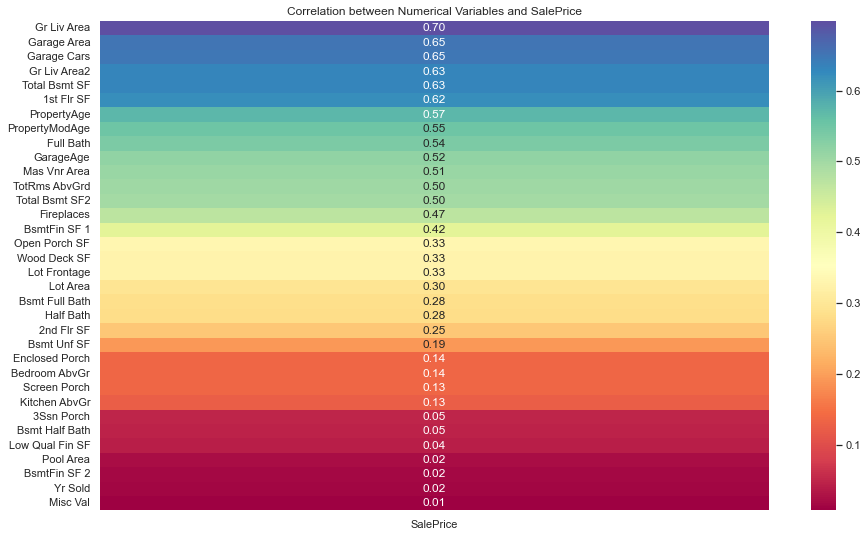

In [37]:
# Plotting the heatmap scale 
sns.set(rc = {'figure.figsize':(15,9)})
single_corr_plot = sns.heatmap(corr_mat_abs, annot = True, fmt='.2f', cmap= "Spectral")
single_corr_plot.set_title('Correlation between Numerical Variables and SalePrice')

##### Based on the correlation values against SalePrice, explanatory variables will be based on the abosolute value of the correlation being less than 0.05.

In [38]:
# Subsetting the features with high correlation with SalePrice
corr_mat_high_corr = corr_mat.loc[(corr_mat['SalePrice'] > 0.05) | (corr_mat['SalePrice'] < -0.05),:]
print(corr_mat_high_corr)
print(corr_mat_high_corr.index)

                SalePrice
SalePrice        1.000000
Gr Liv Area      0.698046
Garage Area      0.650000
Garage Cars      0.648103
Gr Liv Area2     0.632134
Total Bsmt SF    0.631507
1st Flr SF       0.621181
Full Bath        0.537369
Mas Vnr Area     0.509069
TotRms AbvGrd    0.502909
Total Bsmt SF2   0.498304
Fireplaces       0.470091
BsmtFin SF 1     0.424463
Open Porch SF    0.332090
Wood Deck SF     0.327007
Lot Frontage     0.325935
Lot Area         0.295121
Bsmt Full Bath   0.283564
Half Bath        0.282023
2nd Flr SF       0.249091
Bsmt Unf SF      0.191090
Bedroom AbvGr    0.135178
Screen Porch     0.134652
Kitchen AbvGr   -0.125593
Enclosed Porch  -0.135516
GarageAge       -0.516478
PropertyModAge  -0.551421
PropertyAge     -0.572284
Index(['SalePrice', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
       'Gr Liv Area2', 'Total Bsmt SF', '1st Flr SF', 'Full Bath',
       'Mas Vnr Area', 'TotRms AbvGrd', 'Total Bsmt SF2', 'Fireplaces',
       'BsmtFin SF 1', 'Open Porch SF', 'W

In [39]:
# Removing numerical features with low correlation from dataset, remaining features have correlation more than 5%
# These 26 common numerical variables have more than 5% correlation with SalePrice
num_data = raw_data[raw_data.columns.intersection(list(corr_mat_high_corr.index))]
print(num_data.columns)
print(len(num_data.columns))

Index(['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', 'Screen Porch', 'SalePrice', 'PropertyAge',
       'PropertyModAge', 'Gr Liv Area2', 'Total Bsmt SF2', 'GarageAge'],
      dtype='object')
28


In [40]:
data = raw_data.drop(columns = ['3Ssn Porch', 'Pool Area', 'BsmtFin SF 2', 'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Bsmt Half Bath'])
data.shape

(2048, 70)

<AxesSubplot:>

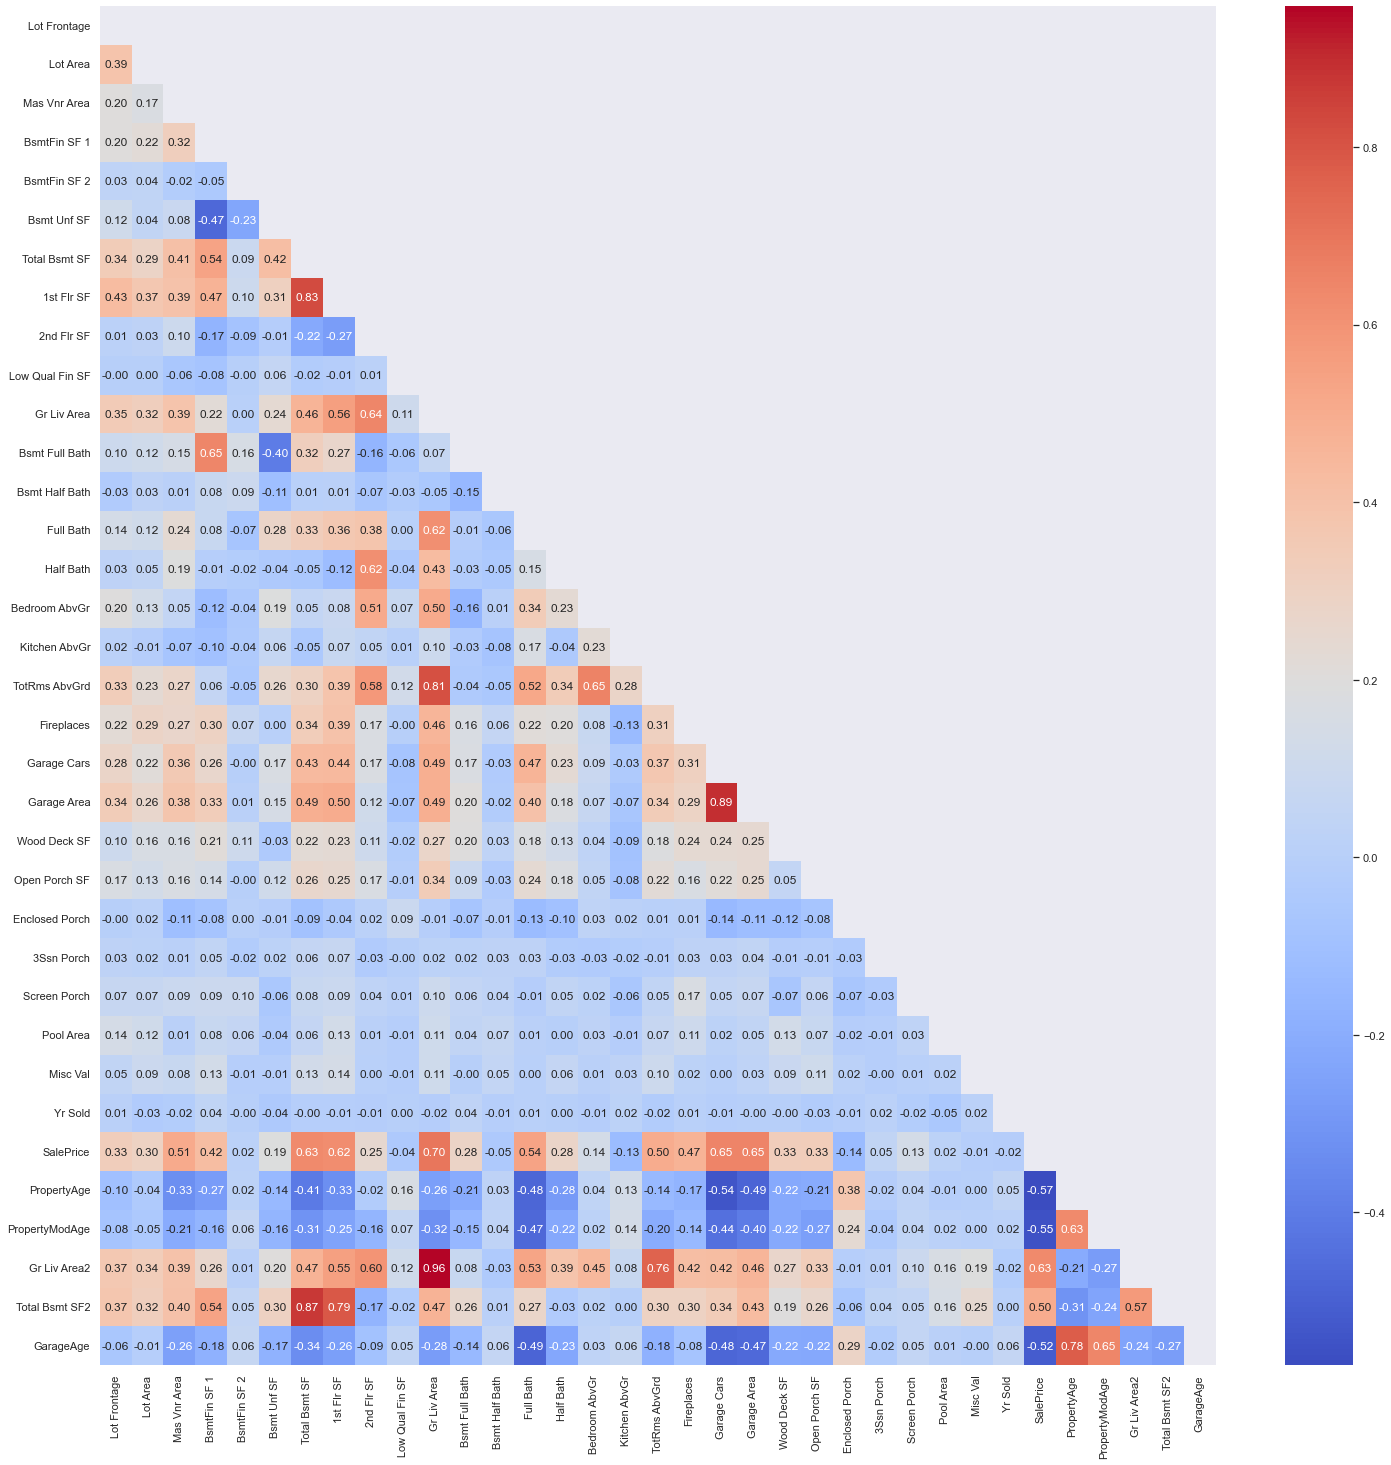

In [41]:
# Plotting correlation heatmap
# This plot shows the correlation between numerical variables with SalePrice
sns.set(rc = {'figure.figsize':(25,25)})
mask = np.triu(np.ones_like(raw_data.corr(), dtype=bool))
sns.heatmap(raw_data.corr(), annot = True, fmt='.2f', cmap= 'coolwarm', mask = mask)

In [42]:
# Finding the pairs of variables with the highest correlation

c = data.corr().abs()
s = c.unstack()
ordered = s.sort_values(kind = 'quicksort')

# Looking for variables with high correlation as possible variables to remove to avoid high multicollinearity, if RSME is high
print(ordered[-39:-29])

Total Bsmt SF2  1st Flr SF        0.788301
Gr Liv Area     TotRms AbvGrd     0.812723
TotRms AbvGrd   Gr Liv Area       0.812723
Total Bsmt SF   1st Flr SF        0.826645
1st Flr SF      Total Bsmt SF     0.826645
Total Bsmt SF   Total Bsmt SF2    0.873621
Total Bsmt SF2  Total Bsmt SF     0.873621
Garage Cars     Garage Area       0.893161
Garage Area     Garage Cars       0.893161
Gr Liv Area2    Gr Liv Area       0.958513
dtype: float64


C:\Users\Joel\AppData\Local\Temp/ipykernel_13156/2359948652.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  raw_data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Lot Frontage'}>,
        <AxesSubplot:title={'center':'Lot Area'}>,
        <AxesSubplot:title={'center':'Mas Vnr Area'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 1'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 2'}>,
        <AxesSubplot:title={'center':'Bsmt Unf SF'}>],
       [<AxesSubplot:title={'center':'Total Bsmt SF'}>,
        <AxesSubplot:title={'center':'1st Flr SF'}>,
        <AxesSubplot:title={'center':'2nd Flr SF'}>,
        <AxesSubplot:title={'center':'Low Qual Fin SF'}>,
        <AxesSubplot:title={'center':'Gr Liv Area'}>,
        <AxesSubplot:title={'center':'Bsmt Full Bath'}>],
       [<AxesSubplot:title={'center':'Bsmt Half Bath'}>,
        <AxesSubplot:title={'center':'Full Bath'}>,
        <AxesSubplot:title={'center':'Half Bath'}>,
        <AxesSubplot:title={'center':'Bedroom AbvGr'}>,
        <AxesSubplot:title={'center':'Kitchen AbvGr'}>,
        <AxesSubplot:title={'center':'TotRms AbvGrd'}>],
       [<Axe

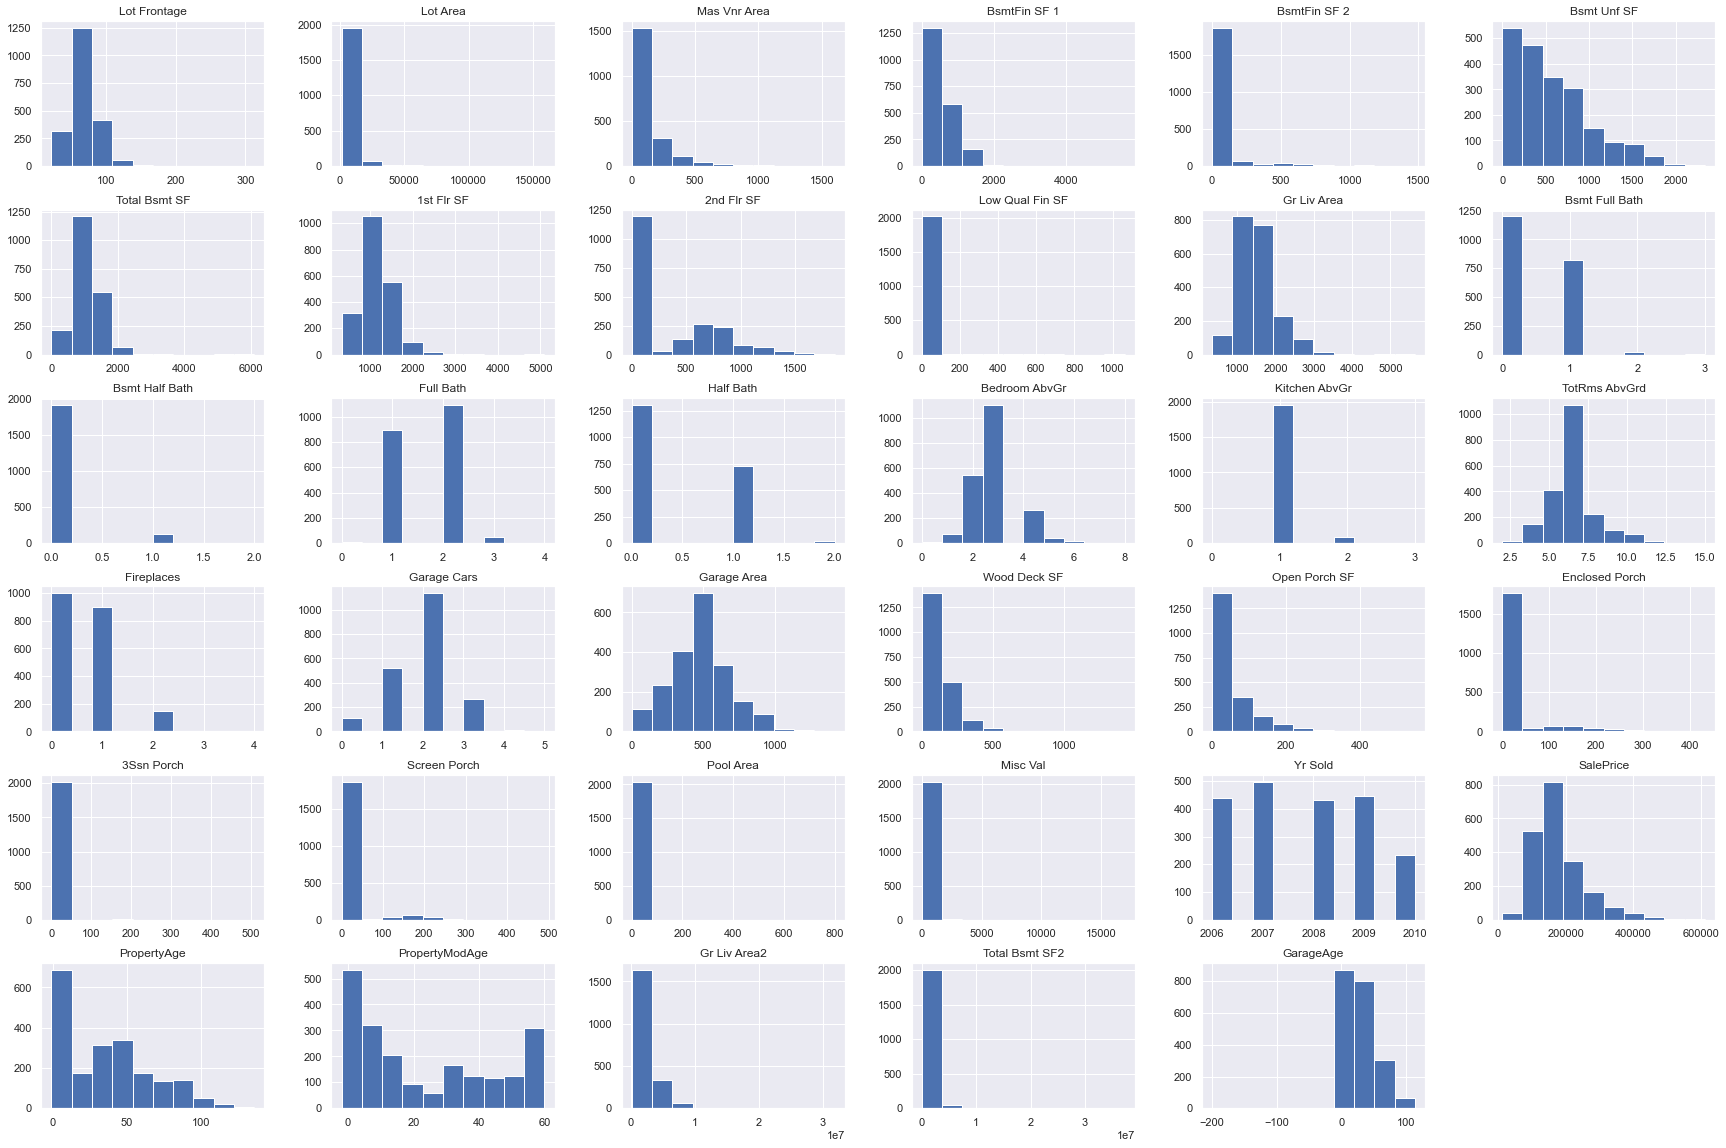

In [43]:
fig = plt.figure(figsize = (30,20))
ax = fig.gca()
raw_data.hist(ax = ax)

##### At this stage, 7 numerical variables are removed given their low correlation: 3Ssn Porch, Mo Sold, Pool Area, BsmtFin SF 2, Misc Val, Yr Sold, Low Qual Fin SF, and Bsmt Half Bath, leaving with 28 numerical variables.


##### It can be observed that the pairings with high correlation that do not include SalePrice are:

- Garage Cars, Garage Area
- 1st Flr SF, Total Bsmt SF
- TotRms AbvGrd, Gr Liv Area
- PropertyAge, GarageAge
- TotRms AbvGrd, Bedroom AbvGr

### Visualizing Categorical Data against SalePrice

In [44]:
# Retrieving the updated list of categorical variables to analyse

cat_var = []
for feature in data:
    if data[feature].dtype == object:
        cat_var.append(feature)
    else:
        pass
cat_var

['MS SubClass',
 'MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Mo Sold',
 'Sale Type']

In [45]:
len(cat_var)

42

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Overall Qual', ylabel='count'>

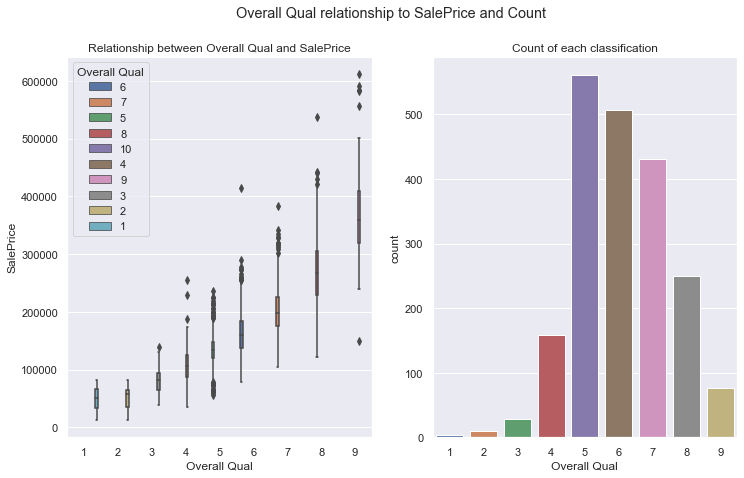

In [46]:
# Plotting for Overall Qual
order_of_overall_qual = ['1','2','3','4','5','6','7','8','9']
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Overall Qual relationship to SalePrice and Count')

axes[0].set_title('Relationship between Overall Qual and SalePrice')
sns.boxplot(ax=axes[0],x='Overall Qual', y="SalePrice", hue='Overall Qual', data=data, order = order_of_overall_qual)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Overall Qual', data=data, order = order_of_overall_qual)

##### Can observe that the higher the overall qual, the higher the SalePrice, however, given the very low count of ratings 1, 2, and 3, these 3 categories can be combined with 4 and renamed 'very low', the same can be said for the ratings 9 and 10, which can be combined with 8 and renamed 'very high'

In [47]:
Overall_Qual_mapping = {'1': 'very low', '2': 'very low', '3': 'very low','4': 'very low', '8': 'very high', 
                        '9': 'very high', '10': 'very high'}
data['Overall Qual'].replace(Overall_Qual_mapping, inplace = True)
data['Overall Qual'].value_counts()
# Based on results, remapped successfully.

5            561
6            506
7            431
very high    350
very low     200
Name: Overall Qual, dtype: int64

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Overall Qual', ylabel='count'>

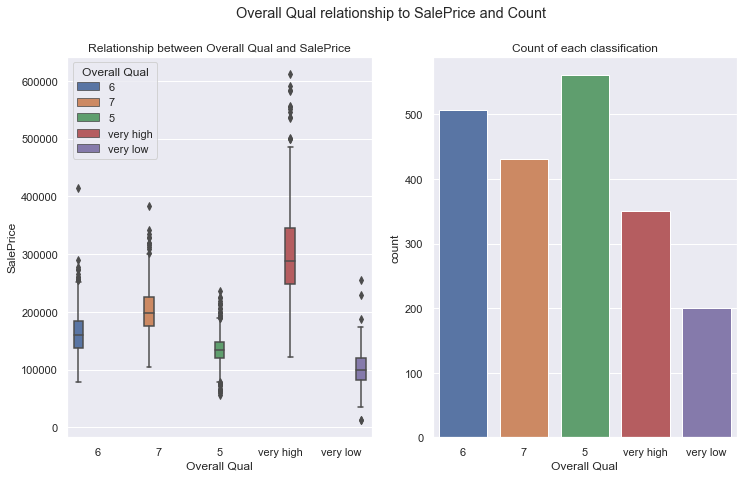

In [48]:
# Plotting for the remapped Overall Qual
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Overall Qual relationship to SalePrice and Count')

axes[0].set_title('Relationship between Overall Qual and SalePrice')
sns.boxplot(ax=axes[0],x='Overall Qual', y="SalePrice", hue='Overall Qual', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Overall Qual', data=data)

##### Can be observed that each category of Overall Qual is sizable with significant variation in their boxplots. This feature will be used.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Overall Cond', ylabel='count'>

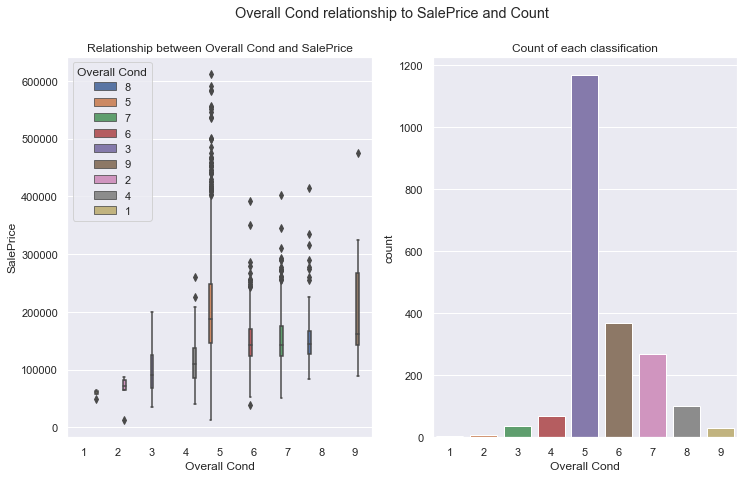

In [49]:
# Plotting for Overall Cond
order_of_overall_cond = ['1','2','3','4','5','6','7','8','9']
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Overall Cond relationship to SalePrice and Count')

axes[0].set_title('Relationship between Overall Cond and SalePrice')
sns.boxplot(ax=axes[0],x='Overall Cond', y="SalePrice", hue='Overall Cond', data=data, order = order_of_overall_cond)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Overall Cond', data=data, order = order_of_overall_cond)

##### There are no observations that are 10. Given the low observation count, ratings 1, 2, and 3 will be grouped with 4 and renamed 'low' and the same can be said for ratings 6,7, 8, and 9, which will be grouped together and renamed ' high'. If the observations in the test csv has a rating of 10, it will be grouped into very high as well.

In [50]:
Overall_Cond_mapping = {'1': 'low', '2': 'low', '3': 'low','4': 'low', '6': 'high','7': 'high',
                        '8': 'high', '9': 'high'}
                        
data['Overall Cond'].replace(Overall_Cond_mapping, inplace = True)
data['Overall Cond'].value_counts()
# Based on results, remapped successfully.

5       1168
high     765
low      115
Name: Overall Cond, dtype: int64

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Overall Cond', ylabel='count'>

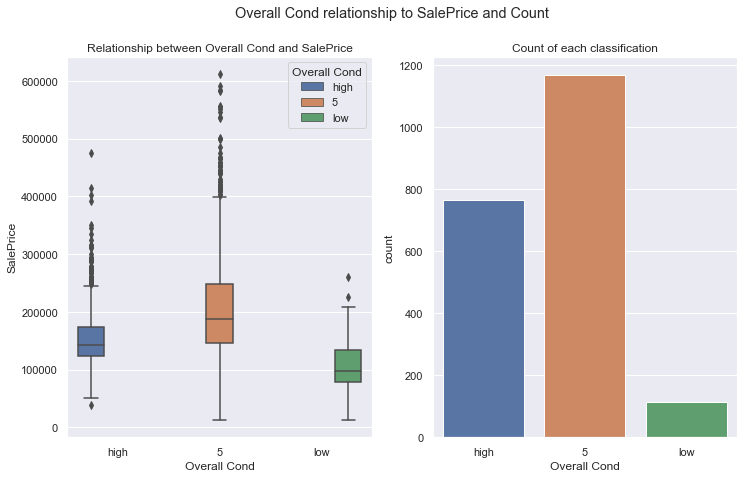

In [51]:
# Plotting for the remapped Overall Cond
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Overall Cond relationship to SalePrice and Count')

axes[0].set_title('Relationship between Overall Cond and SalePrice')
sns.boxplot(ax=axes[0],x='Overall Cond', y="SalePrice", hue='Overall Cond', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Overall Cond', data=data)

##### With the remapping, an interesting observation can be made - Overall Cond that are considered high have a lower median price that those that have rating of 5. Will keep this variable as there seems to be significant variation in boxplots depending on the rating of overall conditions.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Mo Sold', ylabel='count'>

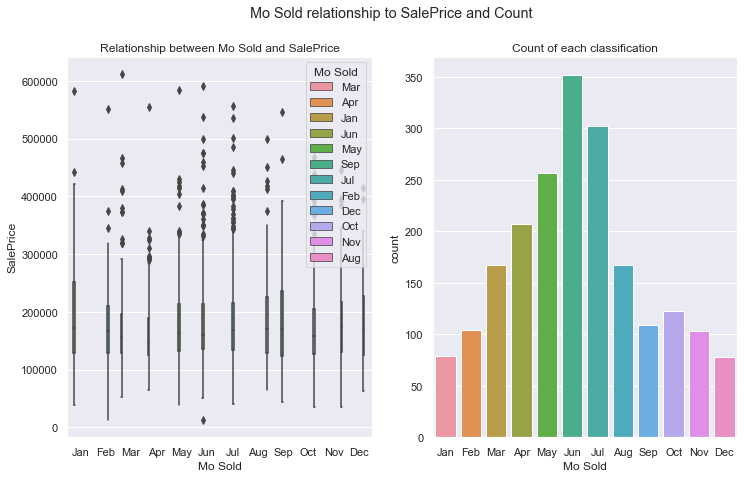

In [52]:
# Plotting for Mo Sold
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Mo Sold relationship to SalePrice and Count')

axes[0].set_title('Relationship between Mo Sold and SalePrice')
sns.boxplot(ax=axes[0],x='Mo Sold', y="SalePrice", hue='Mo Sold', data=data, order = month_order)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Mo Sold', data=data, order = month_order)

##### It can be observed that the barplots of each month do not have significant variation and should be dropped.

In [53]:
data.drop(columns = 'Mo Sold', inplace = True)
data.shape

(2048, 69)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='MS SubClass', ylabel='count'>

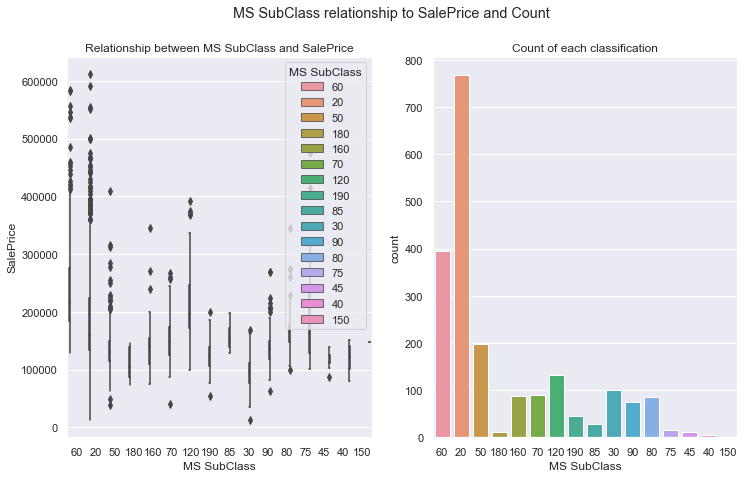

In [54]:
# Plotting for MS SubClass
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('MS SubClass relationship to SalePrice and Count')

axes[0].set_title('Relationship between MS SubClass and SalePrice')
sns.boxplot(ax=axes[0],x='MS SubClass', y="SalePrice", hue='MS SubClass', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='MS SubClass', data=data)

##### Given the low observartion counts of some subclasses of apartments, it would make sense to group them in another category that has a higher frequency.

In [55]:
MS_SubClass_mapping = {'180': '50', '190': '50', '85': '70','75': '70', '45': '50', '40': '50', '150': '20'}
data['MS SubClass'].replace(MS_SubClass_mapping, inplace = True)
data['MS SubClass'].value_counts()
# Based on results, remapped successfully.

20     769
60     394
50     270
70     133
120    132
30     101
160     88
80      86
90      75
Name: MS SubClass, dtype: int64

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='MS SubClass', ylabel='count'>

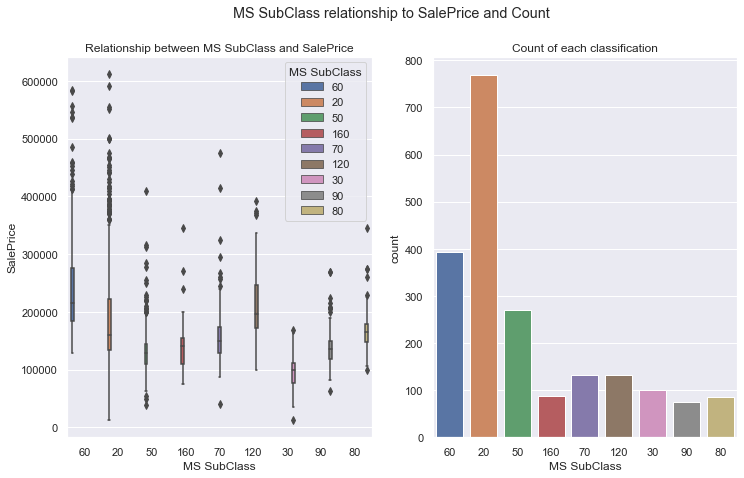

In [56]:
# Plotting for the updated MS SubClass
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('MS SubClass relationship to SalePrice and Count')

axes[0].set_title('Relationship between MS SubClass and SalePrice')
sns.boxplot(ax=axes[0],x='MS SubClass', y="SalePrice", hue='MS SubClass', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='MS SubClass', data=data)

##### It can be seen that each remapped class now each has a higher frequency with significant variation in the boxplots.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='MS Zoning', ylabel='count'>

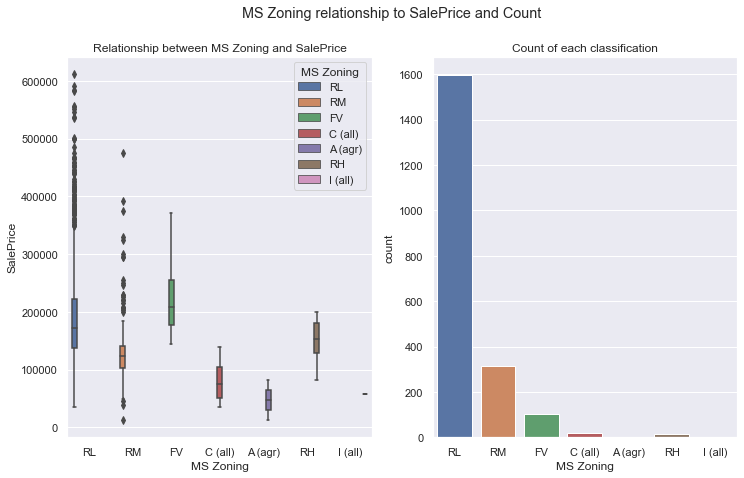

In [57]:
# Plotting for MS Zoning
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('MS Zoning relationship to SalePrice and Count')

axes[0].set_title('Relationship between MS Zoning and SalePrice')
sns.boxplot(ax=axes[0],x='MS Zoning', y="SalePrice", hue='MS Zoning', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='MS Zoning', data=data)

##### Based on this plot, we can see that Residential Low Density classification (RL) of the Sale region (MS Zoning) is disproportionately represented and should not be used in the prediction model.

In [58]:
data.drop(columns = 'MS Zoning', inplace = True)
data.shape

(2048, 68)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Street', ylabel='count'>

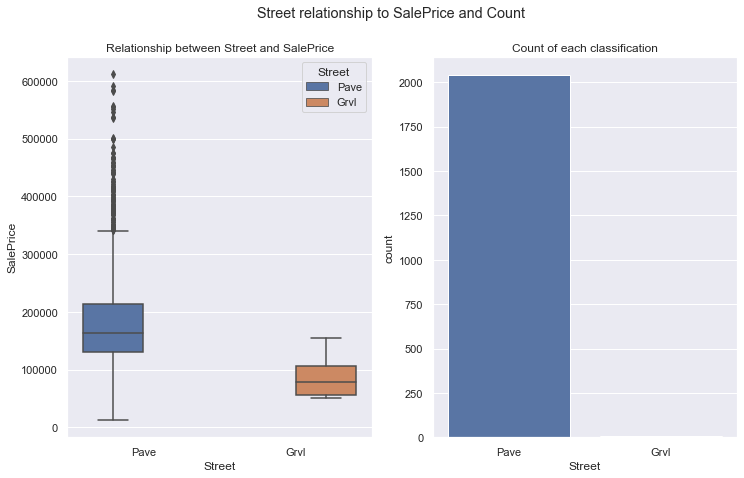

In [59]:
# Plotting for Street
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Street relationship to SalePrice and Count')

axes[0].set_title('Relationship between Street and SalePrice')
sns.boxplot(ax=axes[0],x='Street', y="SalePrice", hue='Street', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Street', data=data)

##### Based on this plot, we can see that Pavement (Pave) type of Road leading up to the property (Street) is disproportionately represented and should not be used in the prediction model.

In [60]:
data.drop(columns = 'Street', inplace = True)
data.shape

(2048, 67)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Lot Shape', ylabel='count'>

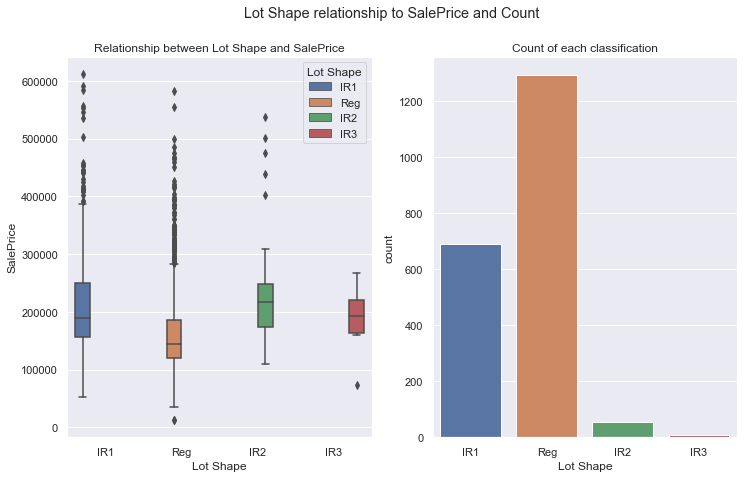

In [61]:
# Plotting for Lot Shape
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Lot Shape relationship to SalePrice and Count')

axes[0].set_title('Relationship between Lot Shape and SalePrice')
sns.boxplot(ax=axes[0],x='Lot Shape', y="SalePrice", hue='Lot Shape', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Lot Shape', data=data)

##### Given the low frequency of IR2 and IR3, and the relatively closeness of IR1, IR2 and IR3 in the box plot, these 3 categories should be combined.

In [62]:
Lot_Shape_mapping = {'IR1': 'IR', 'IR2': 'IR', 'IR3': 'IR'}
data['Lot Shape'].replace(Lot_Shape_mapping, inplace = True)
data['Lot Shape'].value_counts()
# Based on results, remapped successfully.

Reg    1294
IR      754
Name: Lot Shape, dtype: int64

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Lot Shape', ylabel='count'>

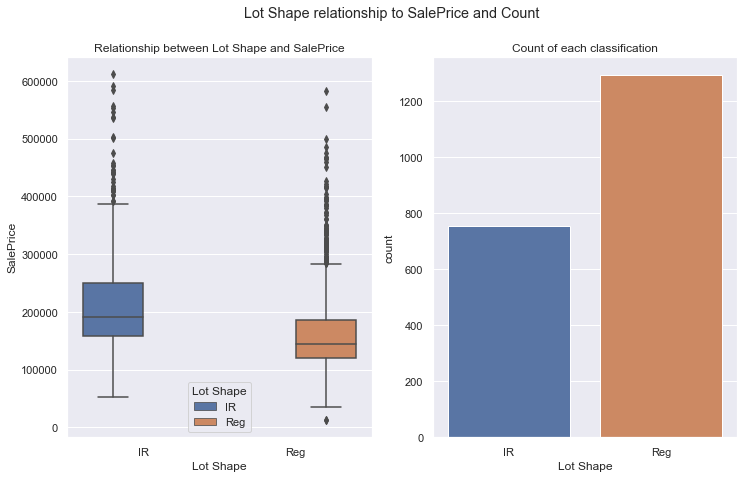

In [63]:
# Plotting for the remapped Lot Shape
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Lot Shape relationship to SalePrice and Count')

axes[0].set_title('Relationship between Lot Shape and SalePrice')
sns.boxplot(ax=axes[0],x='Lot Shape', y="SalePrice", hue='Lot Shape', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Lot Shape', data=data)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Land Contour', ylabel='count'>

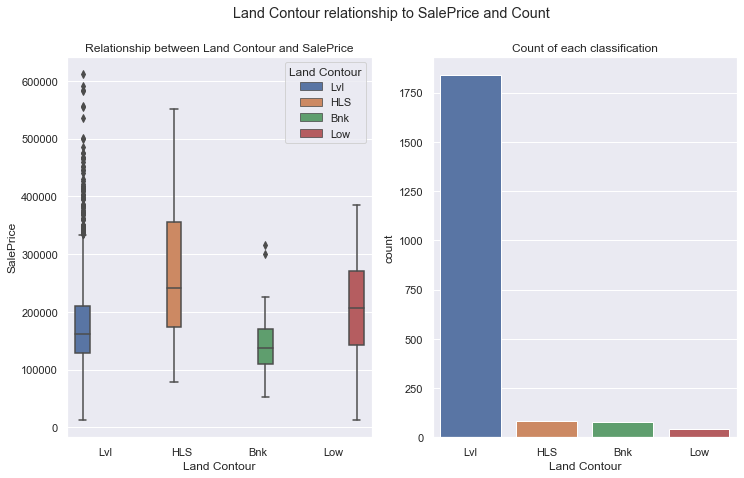

In [64]:
# Plotting for Land Contour
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Land Contour relationship to SalePrice and Count')

axes[0].set_title('Relationship between Land Contour and SalePrice')
sns.boxplot(ax=axes[0],x='Land Contour', y="SalePrice", hue='Land Contour', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Land Contour', data=data)

##### Based on this plot, we can see that Near Flat/ Level (Lvl) flatness of the property (Land Contour) is disproportionately represented and should not be used in the prediction model.

In [65]:
data.drop(columns = 'Land Contour', inplace = True)
data.shape

(2048, 66)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Utilities', ylabel='count'>

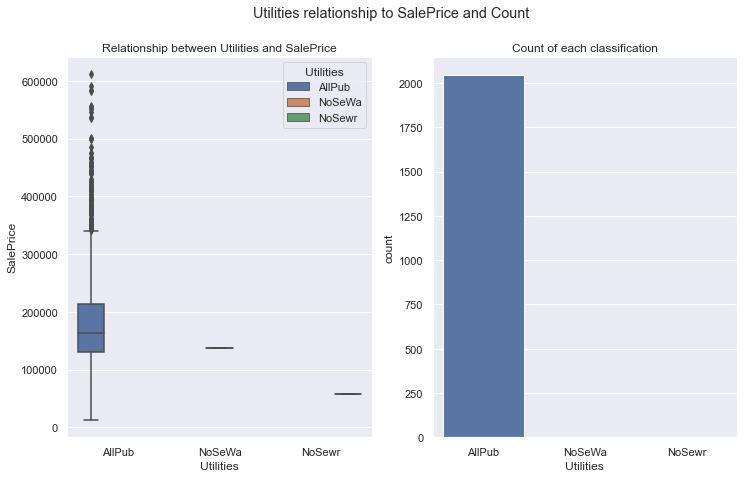

In [66]:
# Plotting for Utilities
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Utilities relationship to SalePrice and Count')

axes[0].set_title('Relationship between Utilities and SalePrice')
sns.boxplot(ax=axes[0],x='Utilities', y="SalePrice", hue='Utilities', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Utilities', data=data)

##### Based on this plot, we can see that All public utilities E,G,W,& S (AllPub) are available (Utilities) is disproportionately represented and should not be used in the prediction model.

In [67]:
data.drop(columns = 'Utilities', inplace = True)
data.shape

(2048, 65)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Lot Config', ylabel='count'>

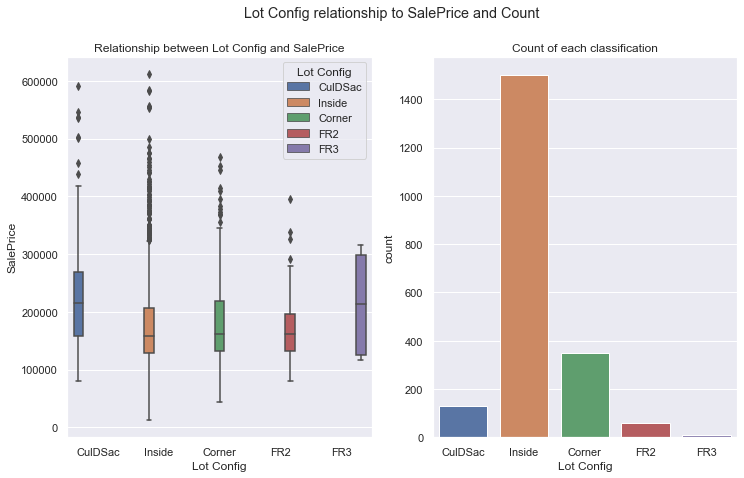

In [68]:
# Plotting for Lot Config
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Lot Config relationship to SalePrice and Count')

axes[0].set_title('Relationship between Lot Config and SalePrice')
sns.boxplot(ax=axes[0],x='Lot Config', y="SalePrice", hue='Lot Config', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Lot Config', data=data)

##### Given the closeness of the barplots of each of the category of Lot configuration (Lot Config) and the disproportionate representation of Inside lot (Inside), this variable should be dropped.

In [69]:
data.drop(columns = 'Lot Config', inplace = True)
data.shape

(2048, 64)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Land Slope', ylabel='count'>

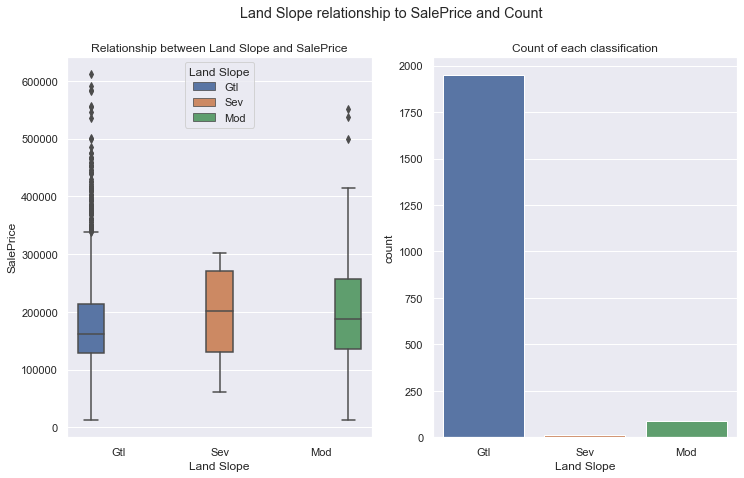

In [70]:
# Plotting for Land Slope
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Land Slope relationship to SalePrice and Count')

axes[0].set_title('Relationship between Land Slope and SalePrice')
sns.boxplot(ax=axes[0],x='Land Slope', y="SalePrice", hue='Land Slope', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Land Slope', data=data)

##### Given the closeness of the barplots of each of the category of Slope of property (Land Slope) and the disproportionate representation of Gentle slope (Gtl), this variable should be dropped.

In [71]:
data.drop(columns = 'Land Slope', inplace = True)
data.shape

(2048, 63)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='count', ylabel='Neighborhood'>

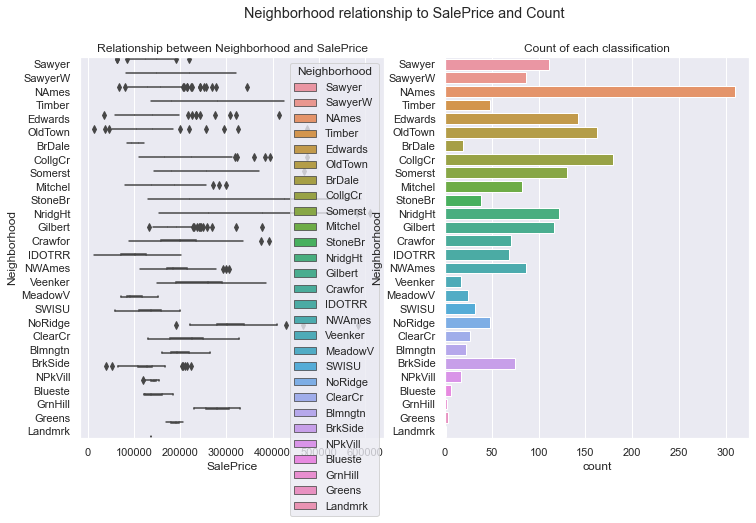

In [72]:
# Plotting for Neighborhood
fig, axes = plt.subplots(1, 2,sharex=False, figsize=(12,7))
fig.suptitle('Neighborhood relationship to SalePrice and Count')

axes[0].set_title('Relationship between Neighborhood and SalePrice')
sns.boxplot(ax=axes[0],y='Neighborhood', x="SalePrice", hue='Neighborhood', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],y='Neighborhood', data=data)

##### There is significant variation between the box plots, coupled with many categories having a sizeable frequency. One way to reduce dimensions (after one-hot encoding) would be to map neighborhood observations below 50 to take on the most commonly observed category - NAmes. This curation can be done better if we have geographical data to map group these categories into regions.

In [73]:
# First finding the count, then replace values with np.nan then fill na with the most observed value in Neighborhood.
neighborhood_val_count = data['Neighborhood'].value_counts()

# Create boolean that shows whether they meet the criteria
filtered = data['Neighborhood'].isin(neighborhood_val_count.index[neighborhood_val_count < 50])
data.loc[filtered, 'Neighborhood'] = np.nan

# Imputing
data['Neighborhood'] = data['Neighborhood'].fillna(data['Neighborhood'].mode()[0])

# Check
data['Neighborhood'].value_counts()

NAmes      614
CollgCr    180
OldTown    163
Edwards    142
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     75
Crawfor     71
IDOTRR      68
Name: Neighborhood, dtype: int64

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='count', ylabel='Neighborhood'>

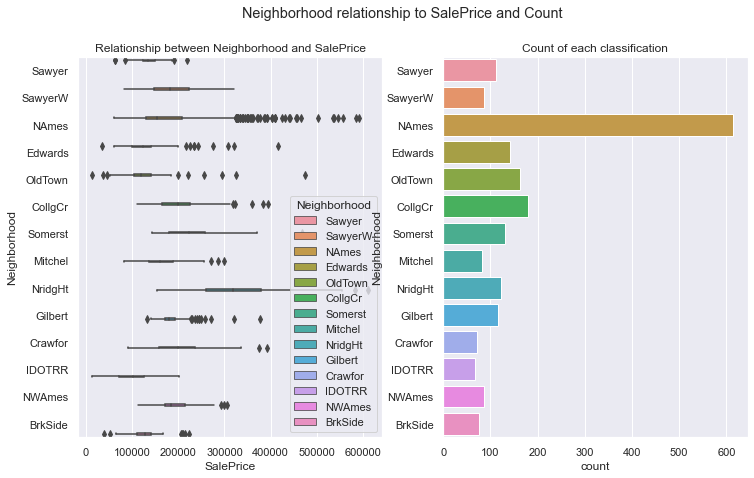

In [74]:
# Plotting the curated Neighborhood variable
fig, axes = plt.subplots(1, 2,sharex=False, figsize=(12,7))
fig.suptitle('Neighborhood relationship to SalePrice and Count')

axes[0].set_title('Relationship between Neighborhood and SalePrice')
sns.boxplot(ax=axes[0],y='Neighborhood', x="SalePrice", hue='Neighborhood', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],y='Neighborhood', data=data)

##### Can observe that there is significant variation of the boxplots, this feature will be used.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Condition 1', ylabel='count'>

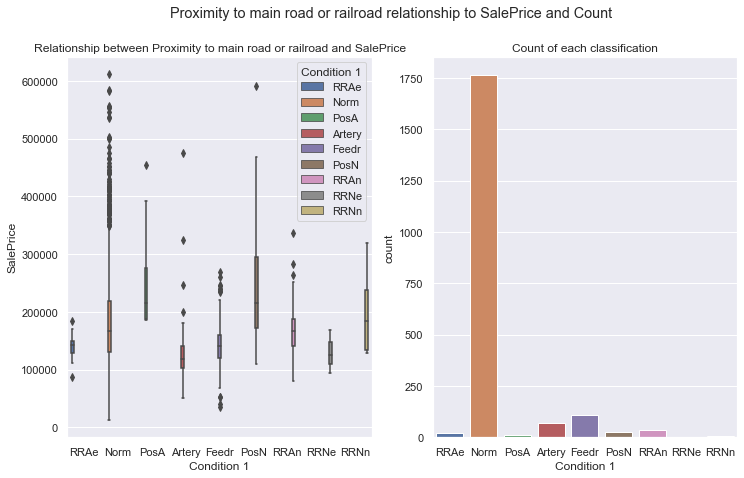

In [75]:
# Plotting for Condition 1 (Proximity to main road or railroad)
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Proximity to main road or railroad relationship to SalePrice and Count')

axes[0].set_title('Relationship between Proximity to main road or railroad and SalePrice')
sns.boxplot(ax=axes[0],x='Condition 1', y="SalePrice", hue='Condition 1', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Condition 1', data=data)

##### Based on this plot, we can see that Normal (Norm) proximity of the property to a main road or railroad (Condition 1) is disproportionately represented and should not be used in the prediction model.

In [76]:
data.drop(columns = 'Condition 1', inplace = True)
data.shape

(2048, 62)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Condition 2', ylabel='count'>

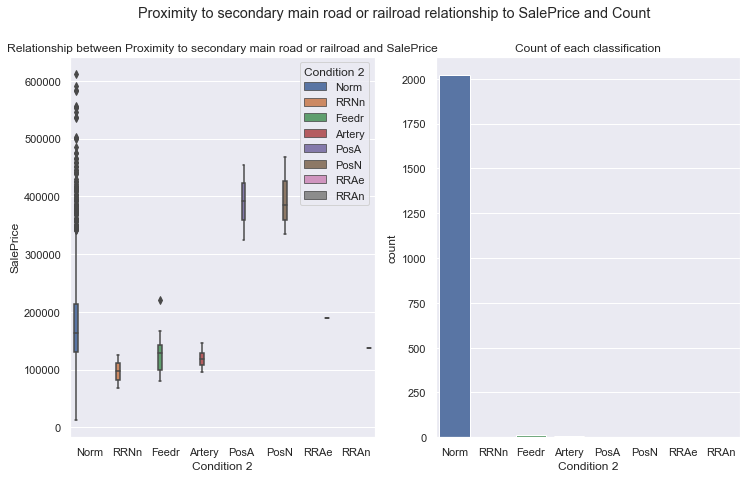

In [77]:
# Plotting for Condition 2 (Proximity to secondary main road or railroad, if present)
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Proximity to secondary main road or railroad relationship to SalePrice and Count')

axes[0].set_title('Relationship between Proximity to secondary main road or railroad and SalePrice')
sns.boxplot(ax=axes[0],x='Condition 2', y="SalePrice", hue='Condition 2', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Condition 2', data=data)

##### Based on this plot, we can see that Normal (Norm) proximity of the property to a secondary main road or railroad (Condition 2) is disproportionately represented and should not be used in the prediction model.

In [78]:
data.drop(columns = 'Condition 2', inplace = True)
data.shape

(2048, 61)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Bldg Type', ylabel='count'>

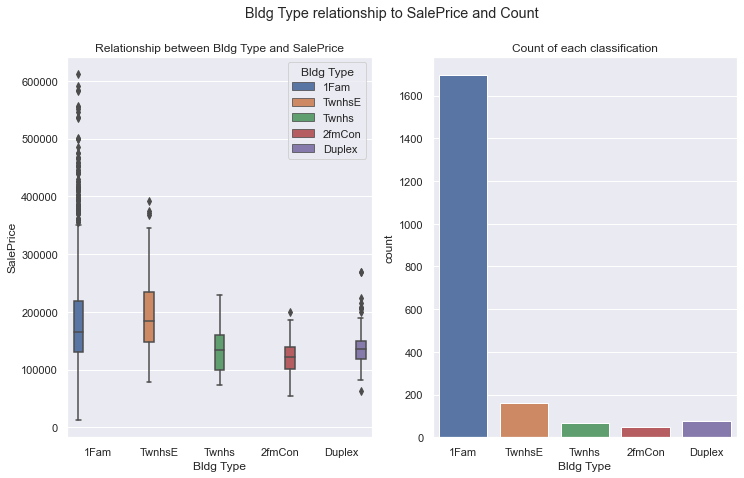

In [79]:
# Plotting for Bldg Type
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Bldg Type relationship to SalePrice and Count')

axes[0].set_title('Relationship between Bldg Type and SalePrice')
sns.boxplot(ax=axes[0],x='Bldg Type', y="SalePrice", hue='Bldg Type', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Bldg Type', data=data)

##### Based on this plot, we can see that Single Family Detached (1Fam) type of dwelling (Bldg Type) is disproportionately represented and should not be used in the prediction model.

In [80]:
data.drop(columns = 'Bldg Type', inplace = True)
data.shape

(2048, 60)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='House Style', ylabel='count'>

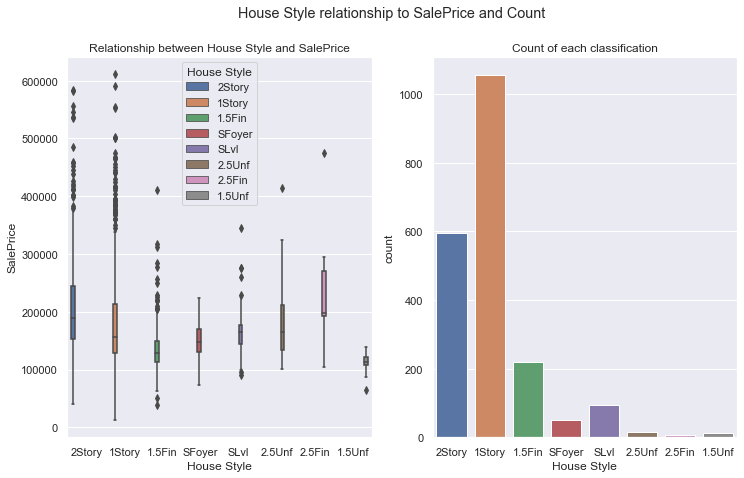

In [81]:
# Plotting for House Style
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('House Style relationship to SalePrice and Count')

axes[0].set_title('Relationship between House Style and SalePrice')
sns.boxplot(ax=axes[0],x='House Style', y="SalePrice", hue='House Style', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='House Style', data=data)

##### It can be observed that based on the description of categories, as well as the boxplots, we are able to reduce dimentionality. Specifically, we can combine the categories as follows:

- 1.5Fin and SFoyer
- 2Story and Slvl
- 2Story and 2.5Unf
- 2Story and 2.5Fin
- 1.5Fin and 1.5Unf

In [82]:
House_Style_mapping = {'SFoyer': '1.5Fin', 'SLvl': '2Story', '2.5Unf': '2Story', 
                       '2.5Fin': '2Story', '1.5Unf': '1.5Fin'}

data['House Style'].replace(House_Style_mapping, inplace = True)
data['House Style'].value_counts()
# Mapping done successfully

1Story    1057
2Story     711
1.5Fin     280
Name: House Style, dtype: int64

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='House Style', ylabel='count'>

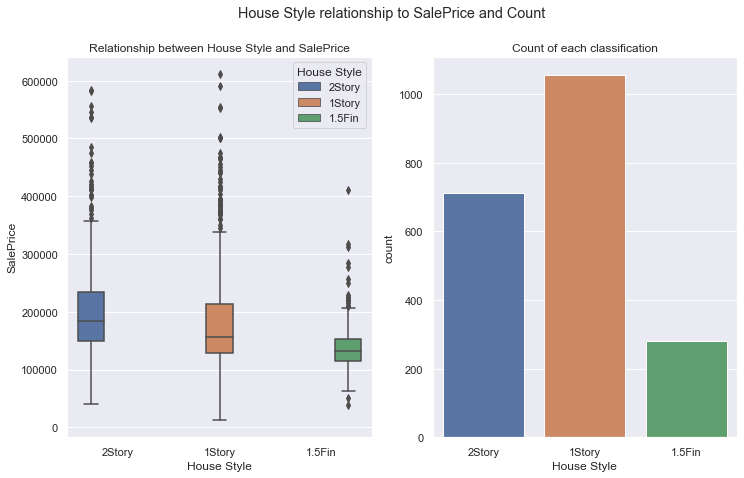

In [83]:
# Plotting the curated House Style
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('House Style relationship to SalePrice and Count')

axes[0].set_title('Relationship between House Style and SalePrice')
sns.boxplot(ax=axes[0],x='House Style', y="SalePrice", hue='House Style', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='House Style', data=data)

##### Based on the variation of the box plots and the high frequency of each category, this feature will be kept.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Roof Style', ylabel='count'>

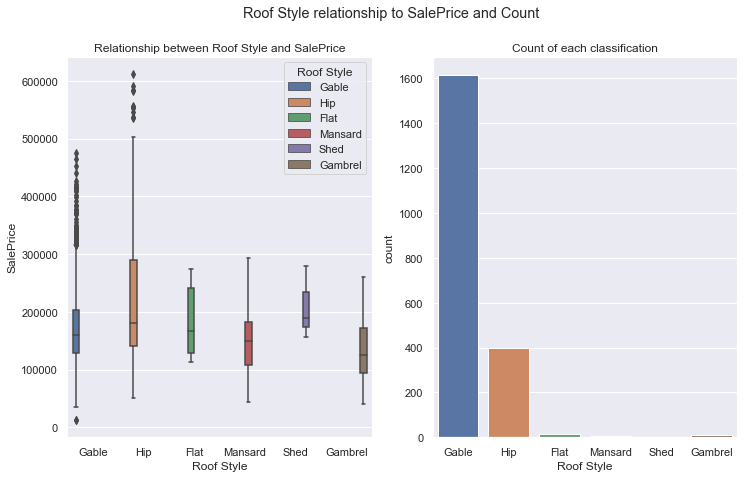

In [84]:
# Plotting for Roof Style
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Roof Style relationship to SalePrice and Count')

axes[0].set_title('Relationship between Roof Style and SalePrice')
sns.boxplot(ax=axes[0],x='Roof Style', y="SalePrice", hue='Roof Style', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Roof Style', data=data)

##### Based on this plot, we can see that Gable (Gable) type of roof (Roof Style) is disproportionately represented and should not be used in the prediction model.

In [85]:
data.drop(columns = 'Roof Style', inplace = True)
data.shape

(2048, 59)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Roof Matl', ylabel='count'>

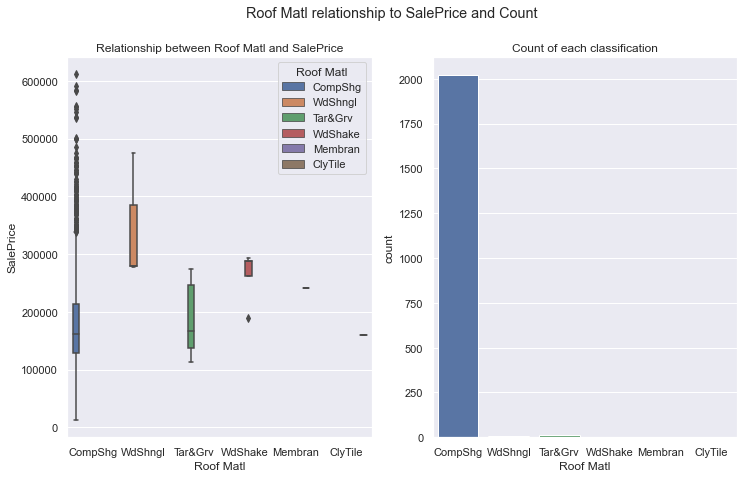

In [86]:
# Plotting for Roof Material
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Roof Matl relationship to SalePrice and Count')

axes[0].set_title('Relationship between Roof Matl and SalePrice')
sns.boxplot(ax=axes[0],x='Roof Matl', y="SalePrice", hue='Roof Matl', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Roof Matl', data=data)

##### Based on this plot, we can see that Standard Composite Shingle (CompShg ) material of roof (Roof Matl) is disproportionately represented and should not be used in the prediction model.

In [87]:
data.drop(columns = 'Roof Matl', inplace = True)
data.shape

(2048, 58)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='count', ylabel='Exterior 1st'>

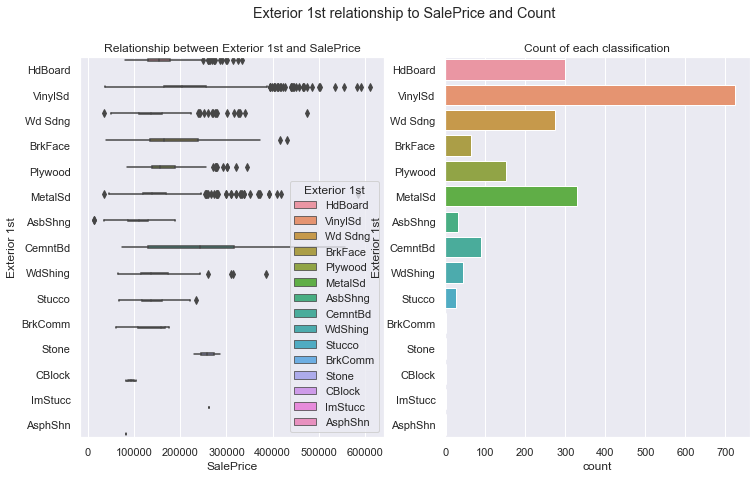

In [88]:
# Plotting for Exterior 1st (Exterior covering on house)
fig, axes = plt.subplots(1, 2,sharex=False, figsize=(12,7))
fig.suptitle('Exterior 1st relationship to SalePrice and Count')

axes[0].set_title('Relationship between Exterior 1st and SalePrice')
sns.boxplot(ax=axes[0],y='Exterior 1st', x="SalePrice", hue='Exterior 1st', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],y='Exterior 1st', data=data)

##### Given the significant variation of each exterior covering on house (Exterior 1st), the non-negligible frequency of many categories, and the lack of contextual sense to combine categories for this feature, this feature will be kept without transformation.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='count', ylabel='Exterior 2nd'>

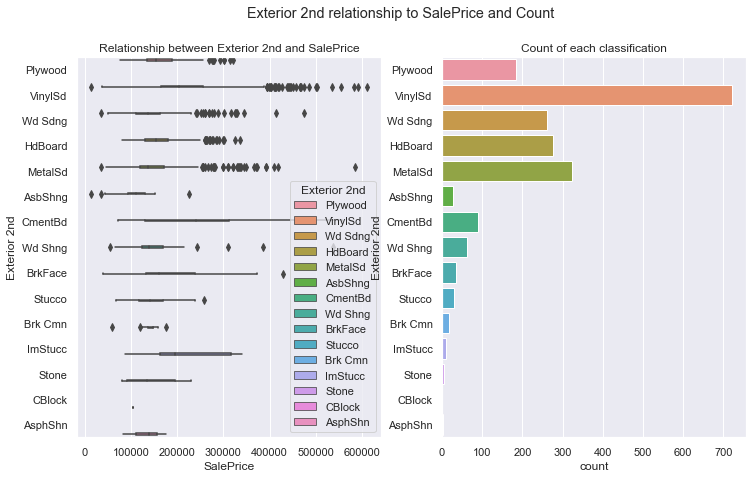

In [89]:
# Plotting for Exterior 2nd (Exterior covering on house)
fig, axes = plt.subplots(1, 2,sharex=False, figsize=(12,7))
fig.suptitle('Exterior 2nd relationship to SalePrice and Count')

axes[0].set_title('Relationship between Exterior 2nd and SalePrice')
sns.boxplot(ax=axes[0],y='Exterior 2nd', x="SalePrice", hue='Exterior 2nd', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],y='Exterior 2nd', data=data)

##### GIven the disproportionately high representation of Plywood, VinylSd, Wd Sdng, HdBoard, and MetalSd, and their respective boxplots being close to each other, this feature should be dropped.

In [90]:
data.drop(columns = 'Exterior 2nd', inplace = True)
data.shape

(2048, 57)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Mas Vnr Type', ylabel='count'>

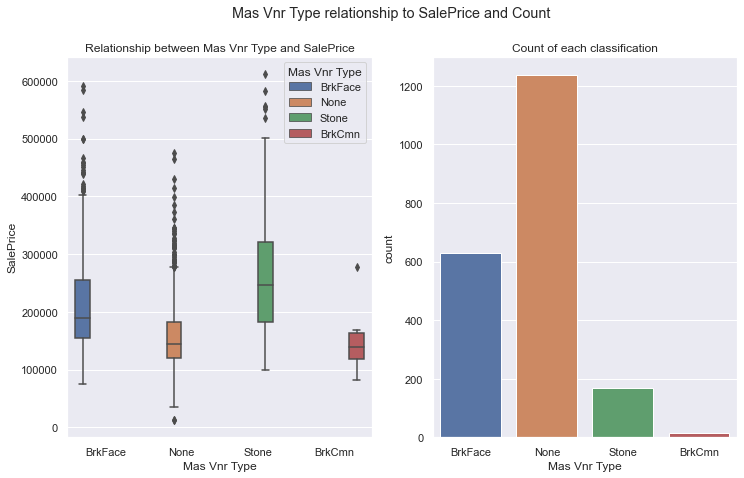

In [91]:
# Plotting for Mas Vnr Type
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Mas Vnr Type relationship to SalePrice and Count')

axes[0].set_title('Relationship between Mas Vnr Type and SalePrice')
sns.boxplot(ax=axes[0],x='Mas Vnr Type', y="SalePrice", hue='Mas Vnr Type', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Mas Vnr Type', data=data)

##### Given significant variation between the categories and the relatively small number of categories, Masonry veneer type (Mas Vnr Type) will be used without any transformation.

##### Given the low value count of each category and the closeness of many boxplots, this feature should be dropped.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Exter Qual', ylabel='count'>

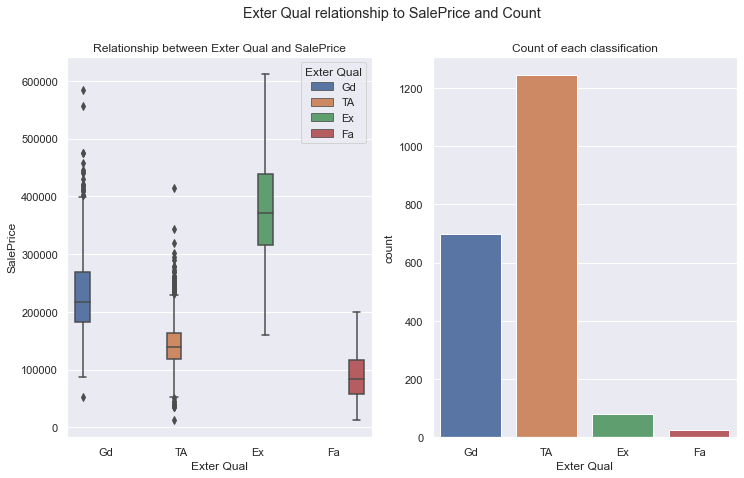

In [92]:
# Plotting for Exter Qual
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Exter Qual relationship to SalePrice and Count')

axes[0].set_title('Relationship between Exter Qual and SalePrice')
sns.boxplot(ax=axes[0],x='Exter Qual', y="SalePrice", hue='Exter Qual', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Exter Qual', data=data)

##### Given the significant variation between exterior material quality (Exter Qual) and relatively low number of categories, this feature will be used without transformation.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Exter Cond', ylabel='count'>

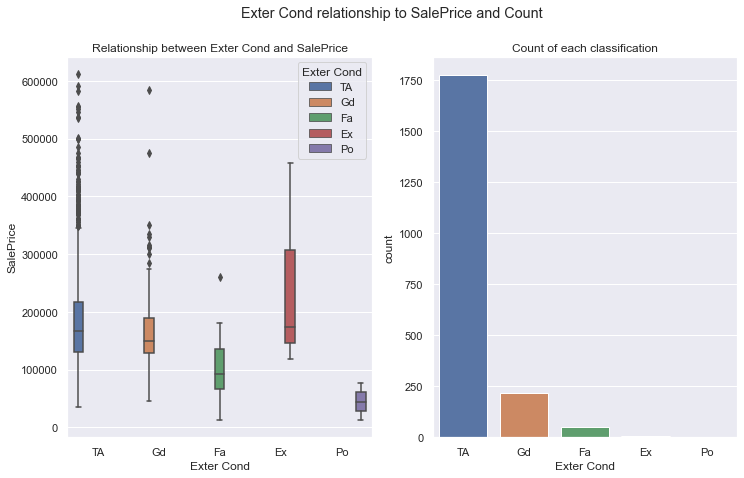

In [93]:
# Plotting for Exter Cond
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Exter Cond relationship to SalePrice and Count')

axes[0].set_title('Relationship between Exter Cond and SalePrice')
sns.boxplot(ax=axes[0],x='Exter Cond', y="SalePrice", hue='Exter Cond', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Exter Cond', data=data)

##### Given the high frequency of Average/Typical (TA) and Good (Gd) condition of the material on the exterior (Exter Cond), and based on the box plot, they do not vary significantly, this feature will be dropped.

In [94]:
data.drop(columns = 'Exter Cond', inplace = True)
data.shape

(2048, 56)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Foundation', ylabel='count'>

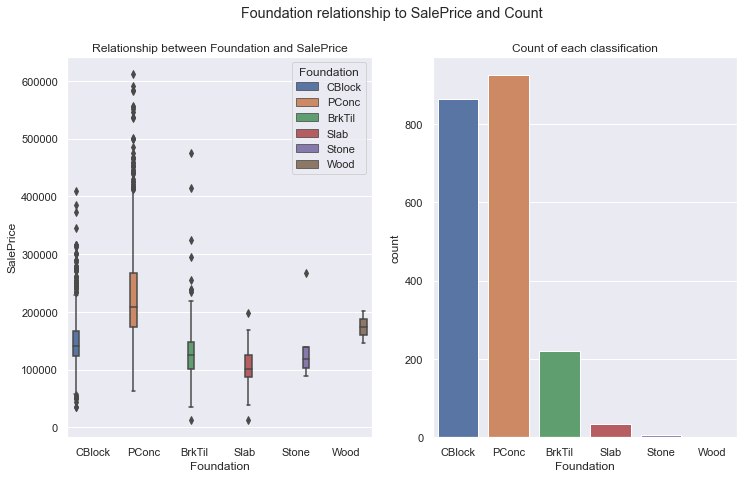

In [95]:
# Plotting for Foundation
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Foundation relationship to SalePrice and Count')

axes[0].set_title('Relationship between Foundation and SalePrice')
sns.boxplot(ax=axes[0],x='Foundation', y="SalePrice", hue='Foundation', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Foundation', data=data)

##### Given the siginificant variation of the boxplots of the categories in type of foundation (Foundation) and some categories having a high observation count, especially Cblock, PConc , and BrkTil , the feature will be used without transformation

In [96]:
data['Bsmt Qual'].value_counts()

TA    940
Gd    863
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Bsmt Qual', ylabel='count'>

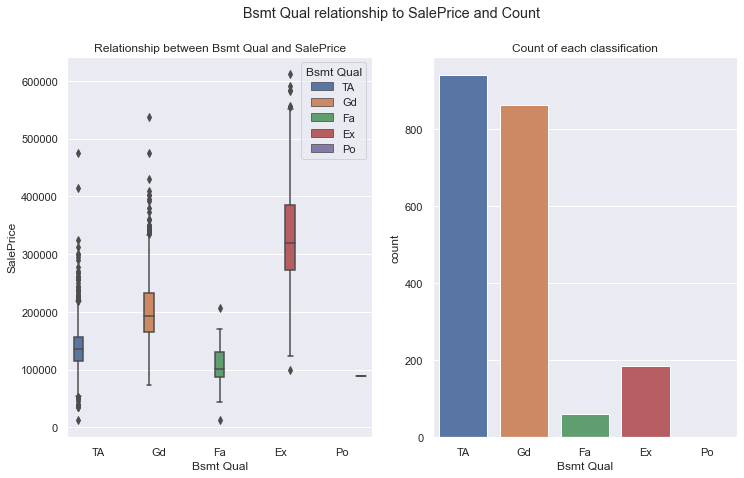

In [97]:
# Plotting for Bsmt Qual
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Bsmt Qual relationship to SalePrice and Count')

axes[0].set_title('Relationship between Bsmt Qual and SalePrice')
sns.boxplot(ax=axes[0],x='Bsmt Qual', y="SalePrice", hue='Bsmt Qual', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Bsmt Qual', data=data)

##### Given the siginificant variation of the boxplots of the categories in height of the basement (Bsmt Qual) and some categories having a high observation count, especially TA, Gd, and Ex , the feature will be used without transformation.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Bsmt Cond', ylabel='count'>

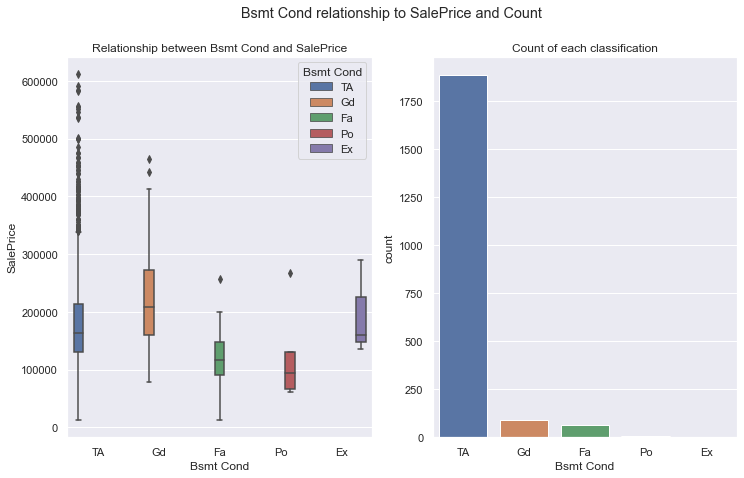

In [98]:
# Plotting for Bsmt Cond
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Bsmt Cond relationship to SalePrice and Count')

axes[0].set_title('Relationship between Bsmt Cond and SalePrice')
sns.boxplot(ax=axes[0],x='Bsmt Cond', y="SalePrice", hue='Bsmt Cond', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Bsmt Cond', data=data)

##### Based on this plot, we can see that Typical (TA) general condition of the basement (BsmtCond) is disproportionately represented and should not be used in the prediction model.

In [99]:
data.drop(columns = 'Bsmt Cond', inplace = True)
data.shape

(2048, 55)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Bsmt Exposure', ylabel='count'>

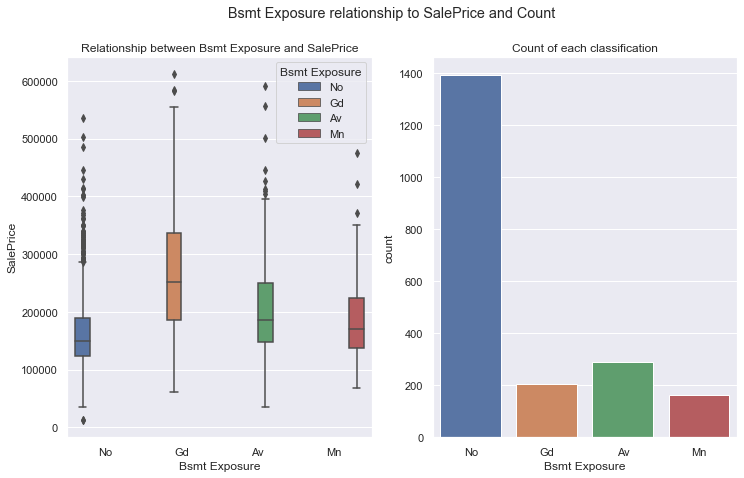

In [100]:
# Plotting for Bsmt Exposure
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Bsmt Exposure relationship to SalePrice and Count')

axes[0].set_title('Relationship between Bsmt Exposure and SalePrice')
sns.boxplot(ax=axes[0],x='Bsmt Exposure', y="SalePrice", hue='Bsmt Exposure', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Bsmt Exposure', data=data)

##### Given the siginificant variation of the boxplots of the categories in exposure to walkout or garden level basement walls (Bsmt Exposure) and each categories having a sizeable count, the feature will be used without transformation.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='BsmtFin Type 1', ylabel='count'>

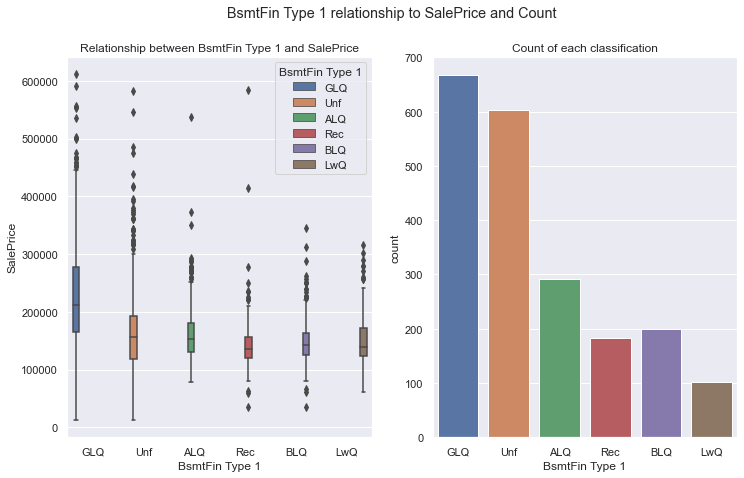

In [101]:
# Plotting for BsmtFin Type 1
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('BsmtFin Type 1 relationship to SalePrice and Count')

axes[0].set_title('Relationship between BsmtFin Type 1 and SalePrice')
sns.boxplot(ax=axes[0],x='BsmtFin Type 1', y="SalePrice", hue='BsmtFin Type 1', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='BsmtFin Type 1', data=data)

##### Given the boxplots, there is variation between the categories of quality of basement finished area (BsmtFin Type 1), with each category having significant frequency. This feature will be used without transformation.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='BsmtFin Type 2', ylabel='count'>

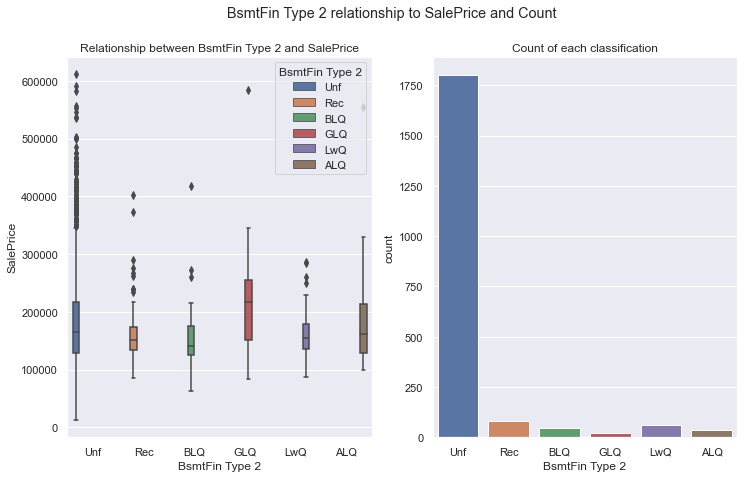

In [102]:
# Plotting for BsmtFin Type 2
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('BsmtFin Type 2 relationship to SalePrice and Count')

axes[0].set_title('Relationship between BsmtFin Type 2 and SalePrice')
sns.boxplot(ax=axes[0],x='BsmtFin Type 2', y="SalePrice", hue='BsmtFin Type 2', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='BsmtFin Type 2', data=data)

##### Based on this plot, we can see that unfinished (Unf) quality of the second finished area (BsmtFin Type 2) is disproportionately represented and should not be used in the prediction model.

In [103]:
data.drop(columns = 'BsmtFin Type 2', inplace = True)
data.shape

(2048, 54)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Heating', ylabel='count'>

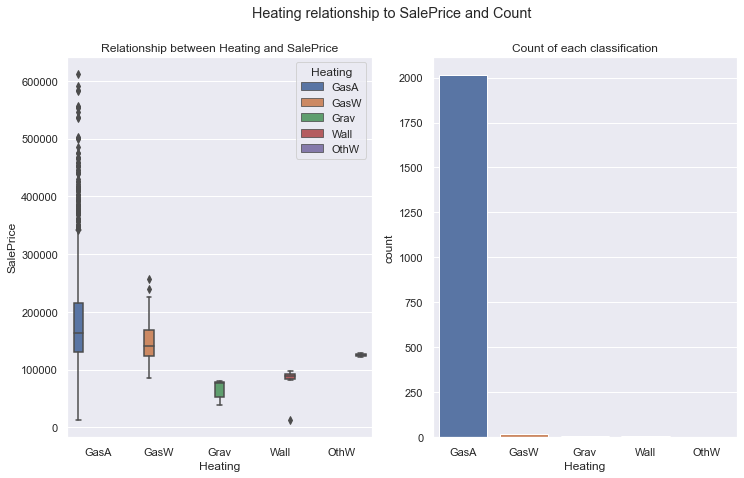

In [104]:
# Plotting for Heating
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Heating relationship to SalePrice and Count')

axes[0].set_title('Relationship between Heating and SalePrice')
sns.boxplot(ax=axes[0],x='Heating', y="SalePrice", hue='Heating', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Heating', data=data)

##### Based on this plot, we can see that gas forced warm air furnace (GasA) type of heating (Heating) is disproportionately represented and should not be used in the prediction model.

In [105]:
data.drop(columns = 'Heating', inplace = True)
data.shape

(2048, 53)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Heating QC', ylabel='count'>

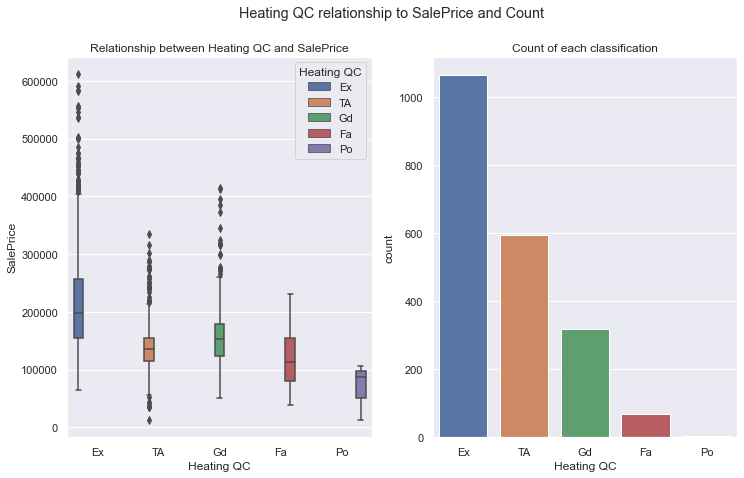

In [106]:
# Plotting for Heating QC
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Heating QC relationship to SalePrice and Count')

axes[0].set_title('Relationship between Heating QC and SalePrice')
sns.boxplot(ax=axes[0],x='Heating QC', y="SalePrice", hue='Heating QC', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Heating QC', data=data)

##### Given the high representation of GasA in type of heating shown in the previous plot, these plots here primarily shows the breakdown of heating quality of GasA. Though the majority of observations of heating quality and condition (Heating QC) is Excellent (Ex), there is significant variation in the boxplots and the observation size for TA and Gd are sizeable. This feature will be used without transformation.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Central Air', ylabel='count'>

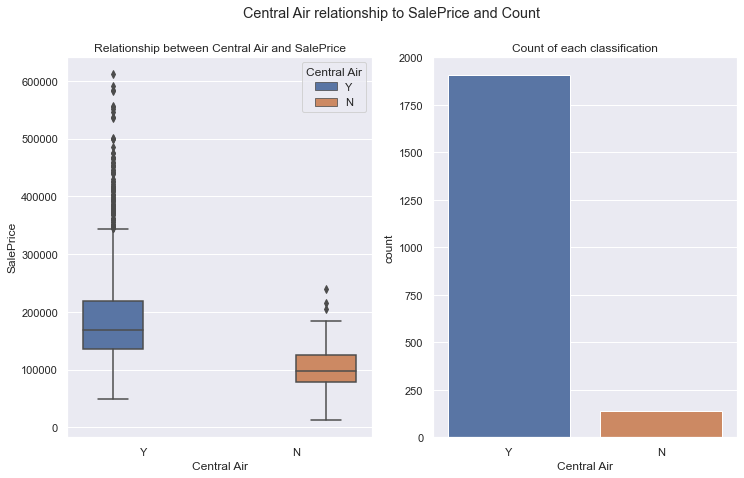

In [107]:
# Plotting for Central Air
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Central Air relationship to SalePrice and Count')

axes[0].set_title('Relationship between Central Air and SalePrice')
sns.boxplot(ax=axes[0],x='Central Air', y="SalePrice", hue='Central Air', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Central Air', data=data)

##### Based on this plot, we can see that the presence of a central air conditioning (Y) is disproportionately represented and should not be used in the prediction model.

In [108]:
data.drop(columns = 'Central Air', inplace = True)
data.shape

(2048, 52)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Electrical', ylabel='count'>

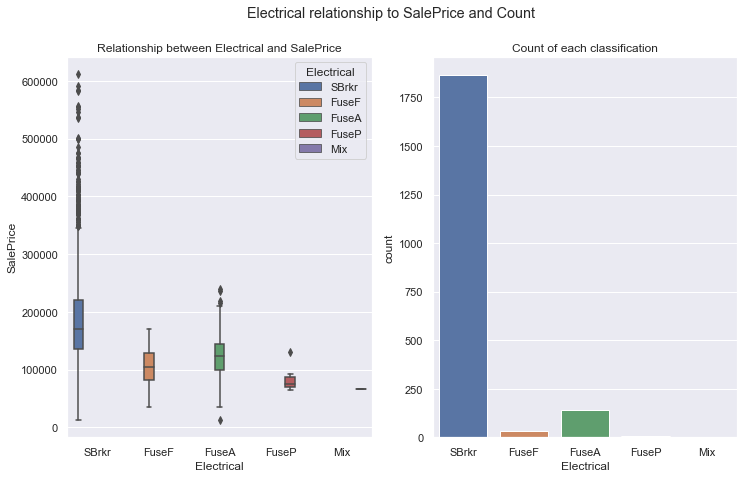

In [109]:
# Plotting for Electrical
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Electrical relationship to SalePrice and Count')

axes[0].set_title('Relationship between Electrical and SalePrice')
sns.boxplot(ax=axes[0],x='Electrical', y="SalePrice", hue='Electrical', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Electrical', data=data)

##### Based on this plot, we can see that the use of Standard Circuit Breakers & Romex (SBrkr) for the property's electric system (Electrical) is disproportionately represented and should not be used in the prediction model.

In [110]:
data.drop(columns = 'Electrical', inplace = True)
data.shape

(2048, 51)

In [111]:
data['Kitchen Qual'].value_counts()
# Note that there are no Kitchen Qual = Po rows remaining

TA    1046
Gd     805
Ex     150
Fa      47
Name: Kitchen Qual, dtype: int64

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Kitchen Qual', ylabel='count'>

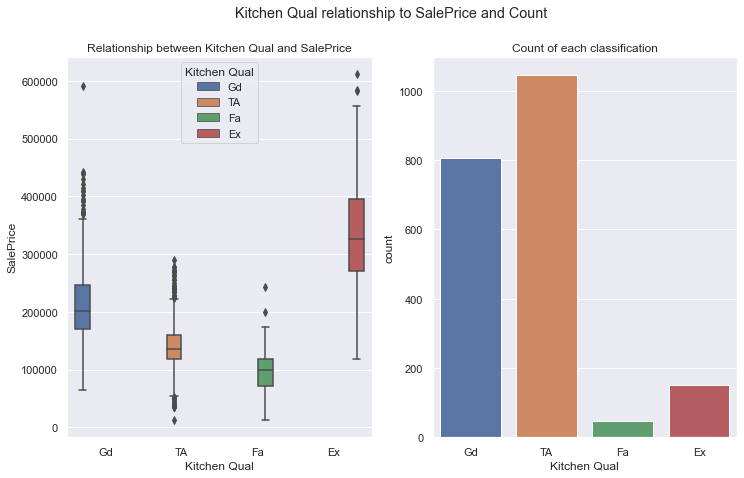

In [112]:
# Plotting for Kitchen Qual
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Kitchen Qual relationship to SalePrice and Count')

axes[0].set_title('Relationship between Kitchen Qual and SalePrice')
sns.boxplot(ax=axes[0],x='Kitchen Qual', y="SalePrice", hue='Kitchen Qual', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Kitchen Qual', data=data)

##### Given the significant variation in the boxplots and small number of categories for the kitchen quality (Kitchen Qual), this feature will be used without transformation.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Functional', ylabel='count'>

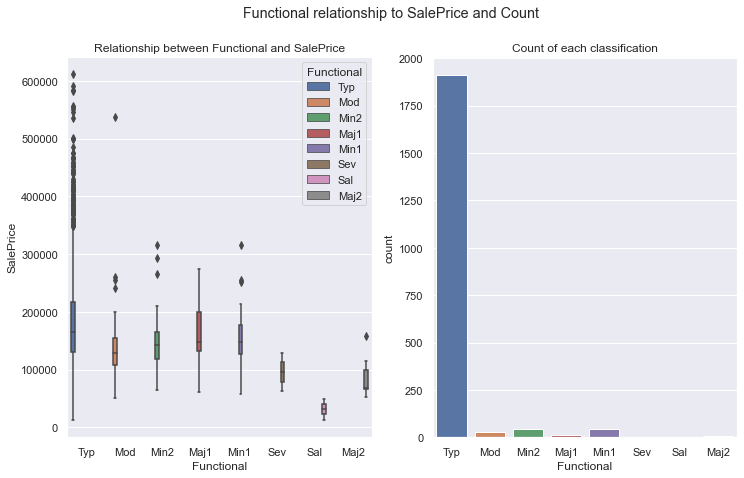

In [113]:
# Plotting for Functional
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Functional relationship to SalePrice and Count')

axes[0].set_title('Relationship between Functional and SalePrice')
sns.boxplot(ax=axes[0],x='Functional', y="SalePrice", hue='Functional', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Functional', data=data)

##### Based on this plot, we can see that the use of typical funcationality (Typ) of the home functionality rating (Functional) is disproportionately represented and should not be used in the prediction model.

In [114]:
data.drop(columns = 'Functional', inplace = True)
data.shape

(2048, 50)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Fireplace Qu', ylabel='count'>

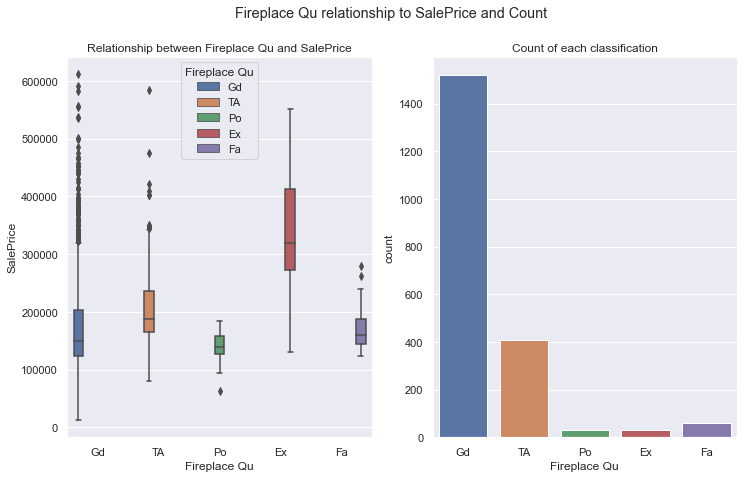

In [115]:
# Plotting for Fireplace Qu
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Fireplace Qu relationship to SalePrice and Count')

axes[0].set_title('Relationship between Fireplace Qu and SalePrice')
sns.boxplot(ax=axes[0],x='Fireplace Qu', y="SalePrice", hue='Fireplace Qu', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Fireplace Qu', data=data)

##### Given the significant variation in boxplots and the non-negligible count especially in Good (Gd) and Average (TA) fireplace quality (Fireplace Qu), this feature will be used without transformation.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Garage Type', ylabel='count'>

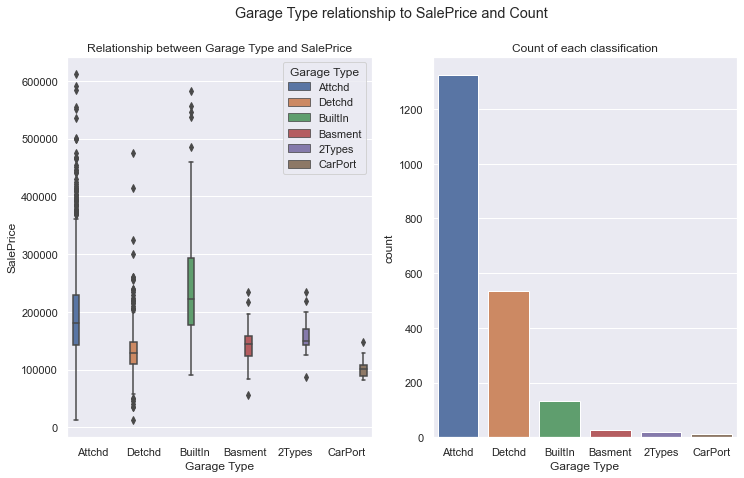

In [116]:
# Plotting for Garage Type
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Garage Type relationship to SalePrice and Count')

axes[0].set_title('Relationship between Garage Type and SalePrice')
sns.boxplot(ax=axes[0],x='Garage Type', y="SalePrice", hue='Garage Type', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Garage Type', data=data)

##### Given the significant variation in boxplots and the small count of Garage location (Garage Type), this feature will be used without transformation.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Garage Finish', ylabel='count'>

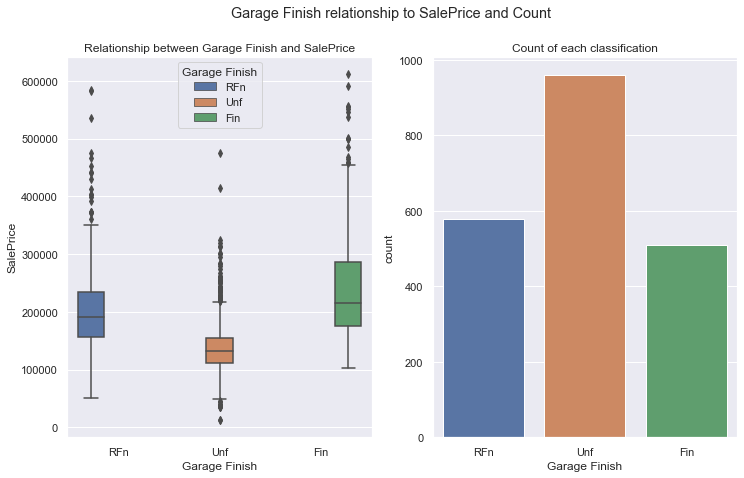

In [117]:
# Plotting for Garage Finish
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Garage Finish relationship to SalePrice and Count')

axes[0].set_title('Relationship between Garage Finish and SalePrice')
sns.boxplot(ax=axes[0],x='Garage Finish', y="SalePrice", hue='Garage Finish', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Garage Finish', data=data)

##### Given the variation and small count of status of interior finish of the garage (Garage Finish), this feature will be used without transformation.

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Garage Qual', ylabel='count'>

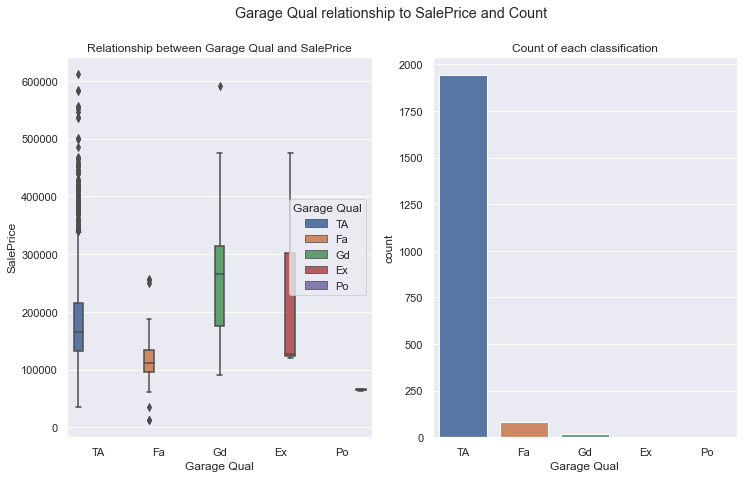

In [118]:
# Plotting for Garage Qual
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Garage Qual relationship to SalePrice and Count')

axes[0].set_title('Relationship between Garage Qual and SalePrice')
sns.boxplot(ax=axes[0],x='Garage Qual', y="SalePrice", hue='Garage Qual', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Garage Qual', data=data)

##### Based on this plot, we can see that Average (TA) garage quality (Garage Qual) is disproportionately represented and should not be used in the prediction model.

In [119]:
data.drop(columns = 'Garage Qual', inplace = True)
data.shape

(2048, 49)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Garage Cond', ylabel='count'>

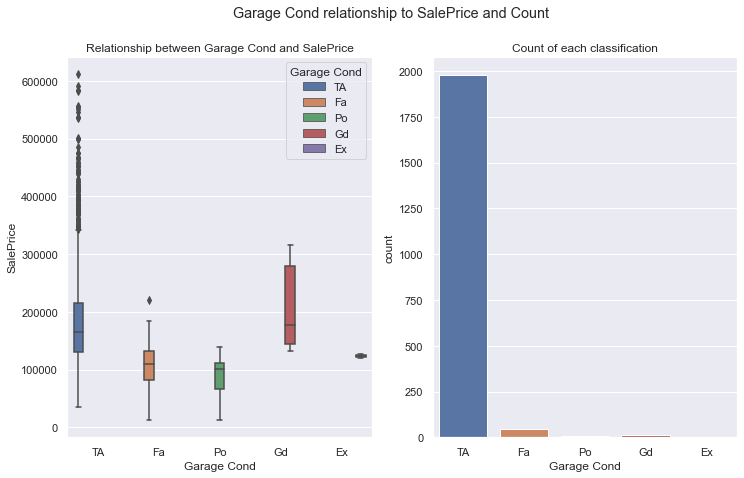

In [120]:
# Plotting for Garage Cond
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Garage Cond relationship to SalePrice and Count')

axes[0].set_title('Relationship between Garage Cond and SalePrice')
sns.boxplot(ax=axes[0],x='Garage Cond', y="SalePrice", hue='Garage Cond', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Garage Cond', data=data)

##### Based on this plot, we can see that Average (TA) garage condition (Garage Cond) is disproportionately represented and should not be used in the prediction model.

In [121]:
data.drop(columns = 'Garage Cond', inplace = True)
data.shape

(2048, 48)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Paved Drive', ylabel='count'>

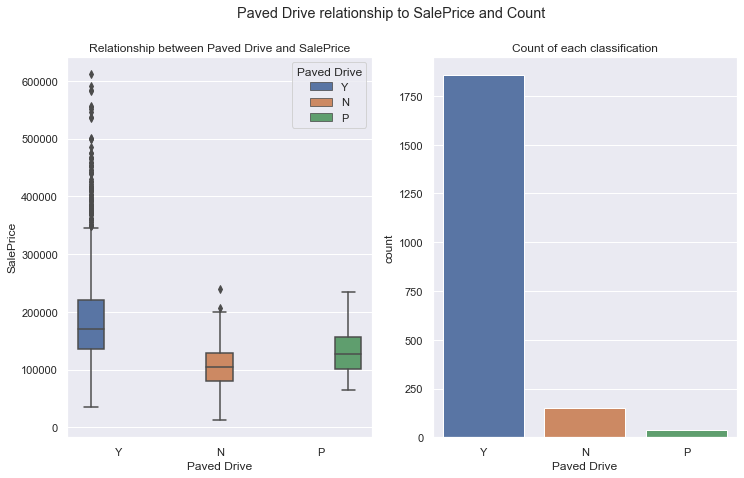

In [122]:
# Plotting for Paved Drive
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Paved Drive relationship to SalePrice and Count')

axes[0].set_title('Relationship between Paved Drive and SalePrice')
sns.boxplot(ax=axes[0],x='Paved Drive', y="SalePrice", hue='Paved Drive', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Paved Drive', data=data)

##### Based on this plot, we can see that paved driveway (Y)  is disproportionately represented and should not be used in the prediction model.

In [123]:
data.drop(columns = 'Paved Drive', inplace = True)
data.shape

(2048, 47)

<AxesSubplot:title={'center':'Count of each classification'}, xlabel='Sale Type', ylabel='count'>

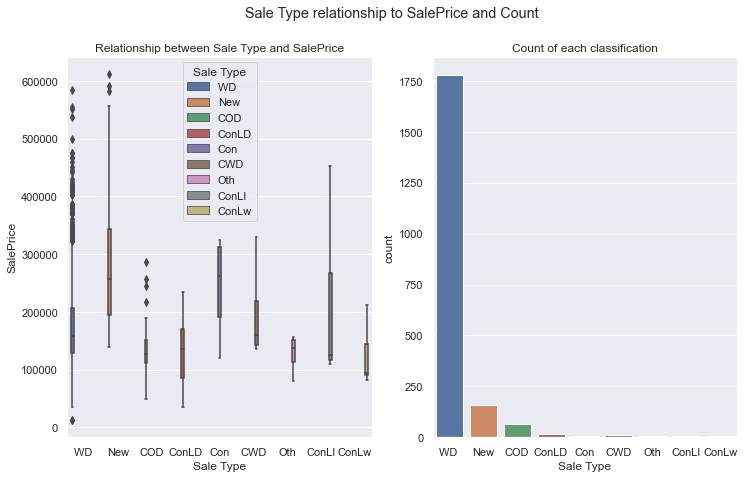

In [124]:
# Plotting for Sale Type
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Sale Type relationship to SalePrice and Count')

axes[0].set_title('Relationship between Sale Type and SalePrice')
sns.boxplot(ax=axes[0],x='Sale Type', y="SalePrice", hue='Sale Type', data=data)

axes[1].set_title('Count of each classification')
sns.countplot(ax=axes[1],x='Sale Type', data=data)

##### Based on this plot, we can see that Warranty Deed - Conventional (WD) type of sale (Sale Type) is disproportionately represented and should not be used in the prediction model.

In [125]:
data.drop(columns = 'Sale Type', inplace = True)
data.shape

(2048, 46)

### Summary of the Handling of Categorical Variables

#### The following 24 categorical variables are removed:
- Mo Sold
- MS Zoning
- Street
- Land Contour
- Utilities
- Lot Config
- Land Slope
- Condition 1
- Condition 2
- Bldg Type
- Roof Style
- Roof Matl
- Exterior 2nd
- Exter Cond
- Bsmt Cond
- BsmtFin Type 2
- Heating
- Central Air
- Electrical
- Functional
- Garage Qual
- Garage Cond
- Paved Drive
- Sale Type

#### The following 6 categorical variables are curated from combination of categories:
- Overall Qual
- Overall Cond
- MS SubClass
- Lot Shape
- Neighborhood
- House Style

#### The following 12 categorical variables are not changed and will be used as is:
- Exterior 1st
- Mas Vnr Type
- Exter Qual
- Foundation
- Bsmt Qual
- Bsmt Exposure
- BsmtFin Type 1
- Heating QC
- Kitchen Qual
- Fireplace Qu
- Garage Type
- Garage Finish

In [126]:
# To check
cat_var = []
for feature in data:
    if data[feature].dtype == object:
        cat_var.append(feature)
    else:
        pass
cat_var

['MS SubClass',
 'Lot Shape',
 'Neighborhood',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Exterior 1st',
 'Mas Vnr Type',
 'Exter Qual',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish']

In [127]:
print("There are {} remaining categorical variables after removing the abovementioned 24 categorical variables".format(len(cat_var)))

There are 18 remaining categorical variables after removing the abovementioned 24 categorical variables


In [128]:
data.shape

(2048, 46)

##### At this stage, this leaves us with a dataset with 2048 observations with 44 features, 26 are numerical and 18 are categorical.

### Investigating the SalePrice (Target Variable)

In [129]:
data['SalePrice'].describe()

count      2048.000000
mean     181484.252441
std       79248.657891
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

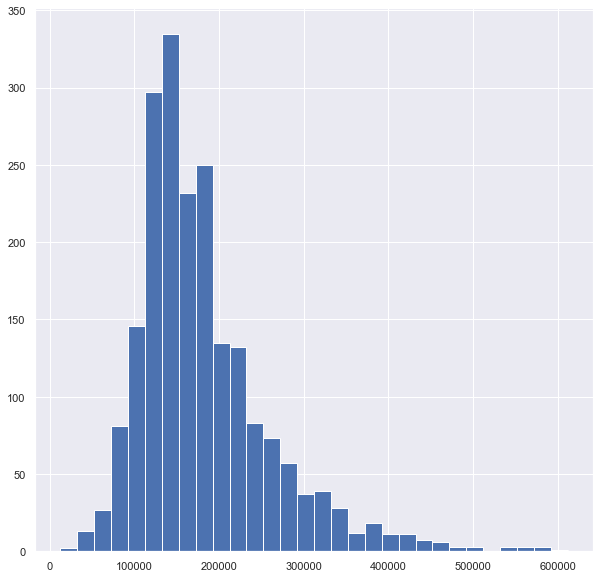

In [130]:
# Plotting the histogram of SalePrice
plt.figure(figsize=(10,10))
plt.hist(data['SalePrice'], bins = 30)
plt.show()

##### It can be observed that Sale Price of houses are not normally distributed, SalePrice has a right skew with the median being 162,500.

### Before training the models, there is a need to one-hot encode categorical variables.

In [131]:
cat_var

['MS SubClass',
 'Lot Shape',
 'Neighborhood',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Exterior 1st',
 'Mas Vnr Type',
 'Exter Qual',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish']

In [132]:
num_var1 = []
for feature in data:
    if data[feature].dtype != object:
        num_var1.append(feature)
    else:
        pass
num_var1

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'Screen Porch',
 'SalePrice',
 'PropertyAge',
 'PropertyModAge',
 'Gr Liv Area2',
 'Total Bsmt SF2',
 'GarageAge']

In [133]:
len(num_var1)

28

##### Have to distinguish the type of variables here in order to avoid categorizing binarized variables as numerical variables when normalizing.

##### Out of the 18 categorical variables, there are 10 ordinal variables and 8 nominal variables.

##### The nominal variables are:
- MS SubClass
- Lot Shape
- Neighborhood
- House Style
- Exterior 1st
- Mas Vnr Type
- Garage Type
- Foundation

##### The ordinal variables are:
- Overall Qual
- Overall Cond
- BsmtFin Type 1
- Bsmt Exposure
- Heating QC
- Exter Qual
- Kitchen Qual
- Fireplace Qu
- Garage Finish
- Bsmt Qual

In [134]:
# Getting dummies for the 8 nominal variables
nom_variables = ['MS SubClass', 'Lot Shape', 'Neighborhood', 'House Style', 'Exterior 1st',
                 'Mas Vnr Type', 'Garage Type', 'Foundation']

nom_dummies = pd.get_dummies(data = data[nom_variables], columns = nom_variables, drop_first = True)

# Drop columns of original nominal variable in dataset
data = data.drop(columns = nom_variables)

# Concatenate the columns of dummy variables (with one less level) 
data = pd.concat([data, nom_dummies], axis=1)

##### As for the 10 ordinal variables, there is a need for greater care as the column to drop would be the lowest category where any other categories are expected to have a positive influence on SalePrice. This is done for greater interpretability.

In [135]:
# Encoding Overall Qual
overallqual_dummies = pd.get_dummies(data['Overall Qual'], prefix='Overall Qual')

# Dropping the lowest category
overallqual_dummies = overallqual_dummies.drop(columns = 'Overall Qual_very low')

# Checking if lowest category is correctly dropped
overallqual_dummies.value_counts()

# Replacing Overall Qual column in data with these dummy columns
data = data.drop(columns = 'Overall Qual')
data = pd.concat([data, overallqual_dummies], axis=1)
data.head()

,Lot Frontage,Lot Area,Overall Cond,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice,PropertyAge,PropertyModAge,Gr Liv Area2,Total Bsmt SF2,GarageAge,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_80,MS SubClass_90,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,House Style_1Story,House Style_2Story,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_very high
0,69.0,13517,high,289.0,Gd,TA,No,GLQ,533.0,192.0,725.0,Ex,725,754,1479,0.0,2,1,3,1,Gd,6,0,Gd,RFn,2.0,475.0,0,44,0,0,130500,34,5,2187441,525625.0,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,43.0,11492,5,132.0,Gd,Gd,No,GLQ,637.0,276.0,913.0,Ex,913,1209,2122,1.0,2,1,4,1,Gd,8,1,TA,RFn,2.0,559.0,0,74,0,0,220000,13,12,4502884,833569.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,68.0,7922,high,0.0,TA,TA,No,GLQ,731.0,326.0,1057.0,TA,1057,0,1057,1.0,1,0,3,1,Gd,5,0,Gd,Unf,1.0,246.0,0,52,0,0,109000,57,3,1117249,1117249.0,57.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
3,73.0,9802,5,0.0,TA,Gd,No,Unf,0.0,384.0,384.0,Gd,744,700,1444,0.0,2,1,3,1,TA,7,0,Gd,Fin,2.0,400.0,100,0,0,0,174000,4,3,2085136,147456.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,82.0,14235,high,0.0,TA,Fa,No,Unf,0.0,676.0,676.0,TA,831,614,1445,0.0,2,0,3,1,TA,6,0,Gd,Unf,2.0,484.0,0,59,0,0,138500,110,17,2088025,456976.0,53.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [136]:
# Encoding Overall Cond
overallcond_dummies = pd.get_dummies(data['Overall Cond'], prefix='Overall Cond')

# Dropping the lowest category
overallcond_dummies = overallcond_dummies.drop(columns = 'Overall Cond_low')

# Checking if lowest category is correctly dropped
overallcond_dummies.value_counts()

# Replacing Overall Cond column in data with these dummy columns
data = data.drop(columns = 'Overall Cond')
data = pd.concat([data, overallcond_dummies], axis=1)
data.head()

,Lot Frontage,Lot Area,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice,PropertyAge,PropertyModAge,Gr Liv Area2,Total Bsmt SF2,GarageAge,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_80,MS SubClass_90,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,House Style_1Story,House Style_2Story,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_very high,Overall Cond_5,Overall Cond_high
0,69.0,13517,289.0,Gd,TA,No,GLQ,533.0,192.0,725.0,Ex,725,754,1479,0.0,2,1,3,1,Gd,6,0,Gd,RFn,2.0,475.0,0,44,0,0,130500,34,5,2187441,525625.0,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,43.0,11492,132.0,Gd,Gd,No,GLQ,637.0,276.0,913.0,Ex,913,1209,2122,1.0,2,1,4,1,Gd,8,1,TA,RFn,2.0,559.0,0,74,0,0,220000,13,12,4502884,833569.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,68.0,7922,0.0,TA,TA,No,GLQ,731.0,326.0,1057.0,TA,1057,0,1057,1.0,1,0,3,1,Gd,5,0,Gd,Unf,1.0,246.0,0,52,0,0,109000,57,3,1117249,1117249.0,57.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
3,73.0,9802,0.0,TA,Gd,No,Unf,0.0,384.0,384.0,Gd,744,700,1444,0.0,2,1,3,1,TA,7,0,Gd,Fin,2.0,400.0,100,0,0,0,174000,4,3,2085136,147456.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
4,82.0,14235,0.0,TA,Fa,No,Unf,0.0,676.0,676.0,TA,831,614,1445,0.0,2,0,3,1,TA,6,0,Gd,Unf,2.0,484.0,0,59,0,0,138500,110,17,2088025,456976.0,53.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [137]:
# Encoding BsmtFin Type 1
bsmtfintype1_dummies = pd.get_dummies(data['BsmtFin Type 1'], prefix='BsmtFin Type 1')

# Dropping the lowest category
bsmtfintype1_dummies = bsmtfintype1_dummies.drop(columns = 'BsmtFin Type 1_Unf')

# Checking if lowest category is correctly dropped
bsmtfintype1_dummies.value_counts()

# Replacing BsmtFin Type 1 column in data with these dummy columns
data = data.drop(columns = 'BsmtFin Type 1')
data = pd.concat([data, bsmtfintype1_dummies], axis=1)
data.head()

,Lot Frontage,Lot Area,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice,PropertyAge,PropertyModAge,Gr Liv Area2,Total Bsmt SF2,GarageAge,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_80,MS SubClass_90,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,House Style_1Story,House Style_2Story,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_very high,Overall Cond_5,Overall Cond_high,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec
0,69.0,13517,289.0,Gd,TA,No,533.0,192.0,725.0,Ex,725,754,1479,0.0,2,1,3,1,Gd,6,0,Gd,RFn,2.0,475.0,0,44,0,0,130500,34,5,2187441,525625.0,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,43.0,11492,132.0,Gd,Gd,No,637.0,276.0,913.0,Ex,913,1209,2122,1.0,2,1,4,1,Gd,8,1,TA,RFn,2.0,559.0,0,74,0,0,220000,13,12,4502884,833569.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
2,68.0,7922,0.0,TA,TA,No,731.0,326.0,1057.0,TA,1057,0,1057,1.0,1,0,3,1,Gd,5,0,Gd,Unf,1.0,246.0,0,52,0,0,109000,57,3,1117249,1117249.0,57.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,73.0,9802,0.0,TA,Gd,No,0.0,384.0,384.0,Gd,744,700,1444,0.0,2,1,3,1,TA,7,0,Gd,Fin,2.0,400.0,100,0,0,0,174000,4,3,2085136,147456.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,82.0,14235,0.0,TA,Fa,No,0.0,676.0,676.0,TA,831,614,1445,0.0,2,0,3,1,TA,6,0,Gd,Unf,2.0,484.0,0,59,0,0,138500,110,17,2088025,456976.0,53.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [138]:
# Encoding Bsmt Exposure
bsmtexposure_dummies = pd.get_dummies(data['Bsmt Exposure'], prefix='Bsmt Exposure')

# Dropping the lowest category
bsmtexposure_dummies = bsmtexposure_dummies.drop(columns = 'Bsmt Exposure_No')

# Checking if lowest category is correctly dropped
bsmtexposure_dummies.value_counts()

# Replacing Bsmt Exposure column in data with these dummy columns
data = data.drop(columns = 'Bsmt Exposure')
data = pd.concat([data, bsmtexposure_dummies], axis=1)
data.head()

,Lot Frontage,Lot Area,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice,PropertyAge,PropertyModAge,Gr Liv Area2,Total Bsmt SF2,GarageAge,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_80,MS SubClass_90,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,House Style_1Story,House Style_2Story,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_very high,Overall Cond_5,Overall Cond_high,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn
0,69.0,13517,289.0,Gd,TA,533.0,192.0,725.0,Ex,725,754,1479,0.0,2,1,3,1,Gd,6,0,Gd,RFn,2.0,475.0,0,44,0,0,130500,34,5,2187441,525625.0,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
1,43.0,11492,132.0,Gd,Gd,637.0,276.0,913.0,Ex,913,1209,2122,1.0,2,1,4,1,Gd,8,1,TA,RFn,2.0,559.0,0,74,0,0,220000,13,12,4502884,833569.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2,68.0,7922,0.0,TA,TA,731.0,326.0,1057.0,TA,1057,0,1057,1.0,1,0,3,1,Gd,5,0,Gd,Unf,1.0,246.0,0,52,0,0,109000,57,3,1117249,1117249.0,57.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3,73.0,9802,0.0,TA,Gd,0.0,384.0,384.0,Gd,744,700,1444,0.0,2,1,3,1,TA,7,0,Gd,Fin,2.0,400.0,100,0,0,0,174000,4,3,2085136,147456.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,82.0,14235,0.0,TA,Fa,0.0,676.0,676.0,TA,831,614,1445,0.0,2,0,3,1,TA,6,0,Gd,Unf,2.0,484.0,0,59,0,0,138500,110,17,2088025,456976.0,53.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [139]:
# Encoding Heating QC
heatingqc_dummies = pd.get_dummies(data['Heating QC'], prefix='Heating QC')

# Dropping the lowest category
heatingqc_dummies = heatingqc_dummies.drop(columns = 'Heating QC_Po')

# Checking if lowest category is correctly dropped
heatingqc_dummies.value_counts()

# Replacing Heating QC column in data with these dummy columns
data = data.drop(columns = 'Heating QC')
data = pd.concat([data, heatingqc_dummies], axis=1)
data.head()

,Lot Frontage,Lot Area,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice,PropertyAge,PropertyModAge,Gr Liv Area2,Total Bsmt SF2,GarageAge,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_80,MS SubClass_90,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,House Style_1Story,House Style_2Story,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_very high,Overall Cond_5,Overall Cond_high,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA
0,69.0,13517,289.0,Gd,TA,533.0,192.0,725.0,725,754,1479,0.0,2,1,3,1,Gd,6,0,Gd,RFn,2.0,475.0,0,44,0,0,130500,34,5,2187441,525625.0,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1,43.0,11492,132.0,Gd,Gd,637.0,276.0,913.0,913,1209,2122,1.0,2,1,4,1,Gd,8,1,TA,RFn,2.0,559.0,0,74,0,0,220000,13,12,4502884,833569.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,68.0,7922,0.0,TA,TA,731.0,326.0,1057.0,1057,0,1057,1.0,1,0,3,1,Gd,5,0,Gd,Unf,1.0,246.0,0,52,0,0,109000,57,3,1117249,1117249.0,57.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,73.0,9802,0.0,TA,Gd,0.0,384.0,384.0,744,700,1444,0.0,2,1,3,1,TA,7,0,Gd,Fin,2.0,400.0,100,0,0,0,174000,4,3,2085136,147456.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,82.0,14235,0.0,TA,Fa,0.0,676.0,676.0,831,614,1445,0.0,2,0,3,1,TA,6,0,Gd,Unf,2.0,484.0,0,59,0,0,138500,110,17,2088025,456976.0,53.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [140]:
# Encoding Exter Qual
exterqual_dummies = pd.get_dummies(data['Exter Qual'], prefix='Exter Qual')

# Dropping the lowest category
exterqual_dummies = exterqual_dummies.drop(columns = 'Exter Qual_Fa')

# Checking if lowest category is correctly dropped
exterqual_dummies.value_counts()

# Replacing Exter Qual column in data with these dummy columns
data = data.drop(columns = 'Exter Qual')
data = pd.concat([data, exterqual_dummies], axis=1)
data.head()

,Lot Frontage,Lot Area,Mas Vnr Area,Bsmt Qual,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice,PropertyAge,PropertyModAge,Gr Liv Area2,Total Bsmt SF2,GarageAge,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_80,MS SubClass_90,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,House Style_1Story,House Style_2Story,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_very high,Overall Cond_5,Overall Cond_high,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA,Exter Qual_Ex,Exter Qual_Gd,Exter Qual_TA
0,69.0,13517,289.0,TA,533.0,192.0,725.0,725,754,1479,0.0,2,1,3,1,Gd,6,0,Gd,RFn,2.0,475.0,0,44,0,0,130500,34,5,2187441,525625.0,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,43.0,11492,132.0,Gd,637.0,276.0,913.0,913,1209,2122,1.0,2,1,4,1,Gd,8,1,TA,RFn,2.0,559.0,0,74,0,0,220000,13,12,4502884,833569.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,7922,0.0,TA,731.0,326.0,1057.0,1057,0,1057,1.0,1,0,3,1,Gd,5,0,Gd,Unf,1.0,246.0,0,52,0,0,109000,57,3,1117249,1117249.0,57.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,73.0,9802,0.0,Gd,0.0,384.0,384.0,744,700,1444,0.0,2,1,3,1,TA,7,0,Gd,Fin,2.0,400.0,100,0,0,0,174000,4,3,2085136,147456.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,82.0,14235,0.0,Fa,0.0,676.0,676.0,831,614,1445,0.0,2,0,3,1,TA,6,0,Gd,Unf,2.0,484.0,0,59,0,0,138500,110,17,2088025,456976.0,53.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [141]:
# Encoding Kitchen Qual
kitchenqual_dummies = pd.get_dummies(data['Kitchen Qual'], prefix='Kitchen Qual')

# Dropping the lowest category
kitchenqual_dummies = kitchenqual_dummies.drop(columns = 'Kitchen Qual_Fa')

# Checking if lowest category is correctly dropped
kitchenqual_dummies.value_counts()

# Replacing Kitchen Qual column in data with these dummy columns
data = data.drop(columns = 'Kitchen Qual')
data = pd.concat([data, kitchenqual_dummies], axis=1)
data.head()

,Lot Frontage,Lot Area,Mas Vnr Area,Bsmt Qual,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice,PropertyAge,PropertyModAge,Gr Liv Area2,Total Bsmt SF2,GarageAge,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_80,MS SubClass_90,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,House Style_1Story,House Style_2Story,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_very high,Overall Cond_5,Overall Cond_high,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA,Exter Qual_Ex,Exter Qual_Gd,Exter Qual_TA,Kitchen Qual_Ex,Kitchen Qual_Gd,Kitchen Qual_TA
0,69.0,13517,289.0,TA,533.0,192.0,725.0,725,754,1479,0.0,2,1,3,1,6,0,Gd,RFn,2.0,475.0,0,44,0,0,130500,34,5,2187441,525625.0,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,43.0,11492,132.0,Gd,637.0,276.0,913.0,913,1209,2122,1.0,2,1,4,1,8,1,TA,RFn,2.0,559.0,0,74,0,0,220000,13,12,4502884,833569.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,68.0,7922,0.0,TA,731.0,326.0,1057.0,1057,0,1057,1.0,1,0,3,1,5,0,Gd,Unf,1.0,246.0,0,52,0,0,109000,57,3,1117249,1117249.0,57.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,73.0,9802,0.0,Gd,0.0,384.0,384.0,744,700,1444,0.0,2,1,3,1,7,0,Gd,Fin,2.0,400.0,100,0,0,0,174000,4,3,2085136,147456.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,82.0,14235,0.0,Fa,0.0,676.0,676.0,831,614,1445,0.0,2,0,3,1,6,0,Gd,Unf,2.0,484.0,0,59,0,0,138500,110,17,2088025,456976.0,53.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [142]:
# Encoding Fireplace Qu
fireplacequ_dummies = pd.get_dummies(data['Fireplace Qu'], prefix='Fireplace Qu')

# Dropping the lowest category
fireplacequ_dummies = fireplacequ_dummies.drop(columns = 'Fireplace Qu_Po')

# Checking if lowest category is correctly dropped
fireplacequ_dummies.value_counts()

# Replacing Fireplace Qu column in data with these dummy columns
data = data.drop(columns = 'Fireplace Qu')
data = pd.concat([data, fireplacequ_dummies], axis=1)
data.head()

,Lot Frontage,Lot Area,Mas Vnr Area,Bsmt Qual,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Finish,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice,PropertyAge,PropertyModAge,Gr Liv Area2,Total Bsmt SF2,GarageAge,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_80,MS SubClass_90,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,House Style_1Story,House Style_2Story,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_very high,Overall Cond_5,Overall Cond_high,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA,Exter Qual_Ex,Exter Qual_Gd,Exter Qual_TA,Kitchen Qual_Ex,Kitchen Qual_Gd,Kitchen Qual_TA,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_TA
0,69.0,13517,289.0,TA,533.0,192.0,725.0,725,754,1479,0.0,2,1,3,1,6,0,RFn,2.0,475.0,0,44,0,0,130500,34,5,2187441,525625.0,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
1,43.0,11492,132.0,Gd,637.0,276.0,913.0,913,1209,2122,1.0,2,1,4,1,8,1,RFn,2.0,559.0,0,74,0,0,220000,13,12,4502884,833569.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,68.0,7922,0.0,TA,731.0,326.0,1057.0,1057,0,1057,1.0,1,0,3,1,5,0,Unf,1.0,246.0,0,52,0,0,109000,57,3,1117249,1117249.0,57.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,73.0,9802,0.0,Gd,0.0,384.0,384.0,744,700,1444,0.0,2,1,3,1,7,0,Fin,2.0,400.0,100,0,0,0,174000,4,3,2085136,147456.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
4,82.0,14235,0.0,Fa,0.0,676.0,676.0,831,614,1445,0.0,2,0,3,1,6,0,Unf,2.0,484.0,0,59,0,0,138500,110,17,2088025,456976.0,53.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [143]:
# Encoding Garage Finish
garagefinish_dummies = pd.get_dummies(data['Garage Finish'], prefix='Garage Finish')

# Dropping the lowest category
garagefinish_dummies = garagefinish_dummies.drop(columns = 'Garage Finish_Unf')

# Checking if lowest category is correctly dropped
garagefinish_dummies.value_counts()

# Replacing Garage Finish column in data with these dummy columns
data = data.drop(columns = 'Garage Finish')
data = pd.concat([data, garagefinish_dummies], axis=1)
data.head()

,Lot Frontage,Lot Area,Mas Vnr Area,Bsmt Qual,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice,PropertyAge,PropertyModAge,Gr Liv Area2,Total Bsmt SF2,GarageAge,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_80,MS SubClass_90,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,House Style_1Story,House Style_2Story,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_very high,Overall Cond_5,Overall Cond_high,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA,Exter Qual_Ex,Exter Qual_Gd,Exter Qual_TA,Kitchen Qual_Ex,Kitchen Qual_Gd,Kitchen Qual_TA,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_TA,Garage Finish_Fin,Garage Finish_RFn
0,69.0,13517,289.0,TA,533.0,192.0,725.0,725,754,1479,0.0,2,1,3,1,6,0,2.0,475.0,0,44,0,0,130500,34,5,2187441,525625.0,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,43.0,11492,132.0,Gd,637.0,276.0,913.0,913,1209,2122,1.0,2,1,4,1,8,1,2.0,559.0,0,74,0,0,220000,13,12,4502884,833569.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
2,68.0,7922,0.0,TA,731.0,326.0,1057.0,1057,0,1057,1.0,1,0,3,1,5,0,1.0,246.0,0,52,0,0,109000,57,3,1117249,1117249.0,57.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
3,73.0,9802,0.0,Gd,0.0,384.0,384.0,744,700,1444,0.0,2,1,3,1,7,0,2.0,400.0,100,0,0,0,174000,4,3,2085136,147456.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,82.0,14235,0.0,Fa,0.0,676.0,676.0,831,614,1445,0.0,2,0,3,1,6,0,2.0,484.0,0,59,0,0,138500,110,17,2088025,456976.0,53.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0


In [144]:
# Encoding Basement Qual
basementqual_dummies = pd.get_dummies(data['Bsmt Qual'], prefix='Bsmt Qual')

# Dropping the lowest category
basementqual_dummies = basementqual_dummies.drop(columns = 'Bsmt Qual_Po')

# Checking if lowest category is correctly dropped
basementqual_dummies.value_counts()

# Replacing Basement Qual column in data with these dummy columns
data = data.drop(columns = 'Bsmt Qual')
data = pd.concat([data, basementqual_dummies], axis=1)
data.head()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice,PropertyAge,PropertyModAge,Gr Liv Area2,Total Bsmt SF2,GarageAge,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_80,MS SubClass_90,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,House Style_1Story,House Style_2Story,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_very high,Overall Cond_5,Overall Cond_high,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA,Exter Qual_Ex,Exter Qual_Gd,Exter Qual_TA,Kitchen Qual_Ex,Kitchen Qual_Gd,Kitchen Qual_TA,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_TA,Garage Finish_Fin,Garage Finish_RFn,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_TA
0,69.0,13517,289.0,533.0,192.0,725.0,725,754,1479,0.0,2,1,3,1,6,0,2.0,475.0,0,44,0,0,130500,34,5,2187441,525625.0,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
1,43.0,11492,132.0,637.0,276.0,913.0,913,1209,2122,1.0,2,1,4,1,8,1,2.0,559.0,0,74,0,0,220000,13,12,4502884,833569.0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,68.0,7922,0.0,731.0,326.0,1057.0,1057,0,1057,1.0,1,0,3,1,5,0,1.0,246.0,0,52,0,0,109000,57,3,1117249,1117249.0,57.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
3,73.0,9802,0.0,0.0,384.0,384.0,744,700,1444,0.0,2,1,3,1,7,0,2.0,400.0,100,0,0,0,174000,4,3,2085136,147456.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,82.0,14235,0.0,0.0,676.0,676.0,831,614,1445,0.0,2,0,3,1,6,0,2.0,484.0,0,59,0,0,138500,110,17,2088025,456976.0,53.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0


In [145]:
print("Currently, there are {} features in the dataset.".format(data.shape[1]))

Currently, there are 113 features in the dataset.


In [146]:
data.shape

(2048, 113)

### Creating Holdout subset in data

In [147]:
y  = data['SalePrice']
X = data.loc[:, data.columns != 'SalePrice']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 41)

### Next would be to normalize the numerical variables.

In [149]:
# Creating a new array to remove SalePrice because it should not be scaled
num_var2 = num_var1[:]
num_var2.remove('SalePrice')

In [150]:
assert 'SalePrice' not in num_var2

In [151]:
scaler = StandardScaler()

data[num_var2] = scaler.fit_transform(data[num_var2])

# Need to define again, and this time round X are all the binarized categories and normalized cardinal values, and Y is the
# normalized SalePrice
X = data.loc[:, data.columns != 'SalePrice']
y = data['SalePrice']

# To check 
data['PropertyAge'].describe()
# Results seem to show that the normalizing seems to work, i.e. mean being very close to 0 and std dev being very close to 1.

count    2.048000e+03
mean    -5.312591e-17
std      1.000244e+00
min     -1.225957e+00
25%     -9.610597e-01
50%     -6.703263e-02
75%      5.952097e-01
max      3.310403e+00
Name: PropertyAge, dtype: float64

### Linear Regression

##### The Linear Regression Model will be used as our baseline model

In [152]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting based on test data
lr_pred = lr.predict(X_test)

In [153]:
# Train Score
print('R-squared score is:', lr.score(X_train, y_train))

R-squared score is: 0.9126678229709987


In [154]:
# Cross validation Score, using an arbitrary 5 fold
lr_score = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv = 5).mean()
lr_rmse = np.sqrt(-1 * lr_score)
print('Cross Validation Root Square Mean Error is:',lr_rmse)

Cross Validation Root Square Mean Error is: 26613.65404080392


In [155]:
# Test Score
print('R-squared score is:',lr.score(X_test, y_test))
print('Root Mean Squared Error is:',np.sqrt(metrics.mean_squared_error(lr_pred,y_test)))

R-squared score is: 0.8820359913951034
Root Mean Squared Error is: 26435.76480867312


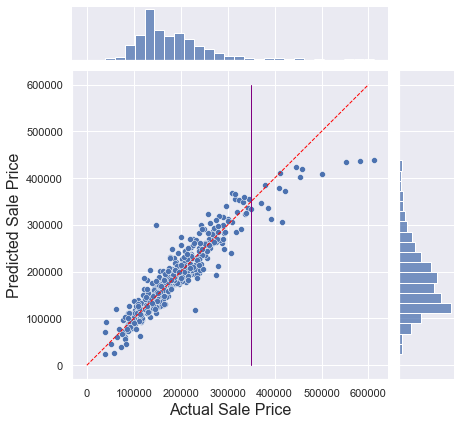

In [156]:
# Plotting test SalePrice against predicted SalePrice from Lasso regression
lr_plot = sns.jointplot(x = y_test, y = lr_pred)
lr_plot.set_axis_labels('Actual Sale Price', 'Predicted Sale Price', fontsize=16)

# Plotting a line of equality
lr_plot.ax_joint.plot([0,600_000], [0,600_000], color = 'red', linewidth = 1, linestyle = 'dashed')
lr_plot.ax_joint.plot([350_000,350_000], [0,600_000], color = 'purple', linewidth = 1, linestyle = 'solid')

##### It can be observed that for SalePrice above 400,000, the points fall below the line of equality. This means that the Lasso Regression will under estimate property prices if the price of the house is greater than 400,000. And the errors get larger as Sale Price increases, this might suggest a non-linear relationship.

### Lasso Regression

In [157]:
# First find the optimal alpha using LassoCV to be used for cross validation later

optimal_lasso = LassoCV(n_alphas=100, cv=5, verbose=1)
optimal_lasso.fit(X_train, y_train)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
................................................................................................................................................................................................................................................................................................................................................................................................................................

27583893942.332565


....................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [158]:
# Performing the Lasso regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

print('R-squared score is:', ls.score(X_train, y_train))
lasso_scores = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
lasso_rmse = np.sqrt(-1* lasso_scores)
print ("Average Cross Val RMSE is:", lasso_rmse)

NameError: name 'ls' is not defined

In [ ]:
# Lasso Regression
ls = Lasso(alpha=optimal_lasso.alpha_)
ls.fit(X_train, y_train)

# Predicting based on test data
ls_pred = ls.predict(X_test)

In [ ]:
# Test Score
print('R-squared score is:',ls.score(X_test, y_test))
print('Root Mean Squared Error is:',np.sqrt(metrics.mean_squared_error(ls_pred,y_test)))

In [ ]:
# Plotting test SalePrice against predicted SalePrice from Lasso regression
lasso_plot = sns.jointplot(x = y_test, y = ls_pred)
lasso_plot.set_axis_labels('Actual Sale Price', 'Predicted Sale Price', fontsize=16)

# Plotting a line of equality
lasso_plot.ax_joint.plot([0,600_000], [0,600_000], color = 'red', linewidth = 1, linestyle = 'dashed')
lasso_plot.ax_joint.plot([0,600_000], [120_000,325_000], color = 'green', linewidth = 1, linestyle = 'solid')

##### It can be observed that for SalePrice above 400,000, the points fall below the line of equality. This means that the Lasso Regression will under estimate property prices if the price of the house is greater than 400,000. And the errors get larger as Sale Price increases, this might suggest a non-linear relationship.

### Ridge Regression

In [ ]:
# First find the optimal alpha using RidgeCV to be used for cross validation later

ridge_alphas = np.logspace(0, 5, 100)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train, y_train)

print (optimal_ridge.alpha_)

In [ ]:
# Performing cross validation Ridge regression 

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
ridge_rmse = np.sqrt(-1 * ridge_scores)
print (ridge_rmse)
print ("Cross Validation RMSE is:",np.mean(ridge_rmse))

In [ ]:
# Ridge Regression
rr = Ridge(alpha=optimal_ridge.alpha_)
rr.fit(X_train, y_train)

# Predicting based on test data
rr_pred = rr.predict(X_test)

In [ ]:
# Test Score
rr_r2 = rr.score(X_test, y_test)
rr_rmse = np.sqrt(metrics.mean_squared_error(rr_pred,y_test))
print('R-squared score is:',rr.score(X_test, y_test))
print('Root Mean Squared Error is:',np.sqrt(metrics.mean_squared_error(rr_pred,y_test)))

In [ ]:
# Plotting test SalePrice against predicted SalePrice from Ridge regression
ridge_plot = sns.jointplot(x = y_test, y = rr_pred)
ridge_plot.set_axis_labels('Actual Sale Price', 'Predicted Sale Price', fontsize=16)

# Plotting a line of equality
ridge_plot.ax_joint.plot([0,600_000], [0,600_000], color = 'red', linewidth = 1, linestyle = 'dashed')
ridge_plot.ax_joint.plot([350_000,350_000], [0,600_000], color = 'purple', linewidth = 1, linestyle = 'solid')

##### It can be observed that for SalePrice above 400,000, the points fall below the line of equality. This means that the Ridge Regression will under estimate property prices if the price of the house is greater than 400,000. And the errors get larger as Sale Price increases, this might suggest a non-linear relationship.

##### An added observation is that for both linear regression and ridge, immediately to the right of the point of intersection between the red dotted line and vertical purple line, those errors are much closer to the line of equality as compared to the lasso regression plot where the actual points are further below.

##### Plotting residuals of Lasso and Ridge Regressions

In [ ]:
lasso_resid = y_test - ls_pred
ridge_resid = y_test - rr_pred

In [ ]:
# Plotting residuals of both plots
lasso_ridge_residual_plot = sns.jointplot(lasso_resid, ridge_resid)
lasso_ridge_residual_plot.set_axis_labels('Lasso Residuals', 'Ridge Residuals', fontsize=16)

In [ ]:
### Residual Analysis

In [ ]:
linear_resid = y_test - lr_pred

In [ ]:
# Plotting residuals of linear reg predictions and its residuals
linear_residual_plot = sns.jointplot(lr_pred, linear_resid)
linear_residual_plot.set_axis_labels('Predicted Sale Price', 'Linear Residuals', fontsize=16)
linear_residual_plot.ax_joint.plot([0,500_000], [0,0], color = 'red', linewidth = 1, linestyle = 'solid')

In [ ]:
# Plotting residuals of lasso reg predictions and its residuals
linear_residual_plot = sns.jointplot(lr_pred, lasso_resid)
linear_residual_plot.set_axis_labels('Predicted Sale Price', 'Lasso Residuals', fontsize=16)
linear_residual_plot.ax_joint.plot([0,500_000], [0,0], color = 'red', linewidth = 1, linestyle = 'solid')
linear_residual_plot.ax_joint.plot([40_000,500_000], [-100_000,230_000], color = 'purple', linewidth = 1, linestyle = 'solid')

##### It can be observed that there seems to be a positive relationship between the lasso regression predicted SalePrice and its residuals, this is an indication that the linear model might not be the best model.

In [ ]:
# Plotting residuals of ridge reg predictions and its residuals
linear_residual_plot = sns.jointplot(lr_pred, ridge_resid)
linear_residual_plot.set_axis_labels('Predicted Sale Price', 'Ridge Residuals', fontsize=16)
linear_residual_plot.ax_joint.plot([0,500_000], [0,0], color = 'red', linewidth = 1, linestyle = 'solid')

##### This plot shows that the assumption of homoskedasticity needed for linear, lasso, and ridge is largely held, though for prices where there are very few observarions (very high or very low prices) tend to violate that assumption.

### Summary of Average Cross Validation RMSE of Linear, Lasso, and Ridge Regressions

In [ ]:
print('The Average Cross Val RMSE of Linear Regression is: ',lr_rmse)
print('The Average Cross Val RMSE of Lasso Regression is: ',lasso_rmse)
print('The Average Cross Val RMSE of Ridge Regression is: ',ridge_rmse)

### Summary of Test RMSE of Linear, Lasso, and Ridge Regressions

In [ ]:
print('The Test RMSE of Linear Regression is: ',np.sqrt(metrics.mean_squared_error(lr_pred,y_test)))
print('The Test RMSE of Lasso Regression is: ',np.sqrt(metrics.mean_squared_error(ls_pred,y_test)))
print('The Test RMSE of Ridge Regression is: ',np.sqrt(metrics.mean_squared_error(rr_pred,y_test)))

##### Based on the results above metrics, the Ridge Regression has the lowest average cross validation and test RSME. Thus, the chosen model will be the Ridge Regression model.

##### The next step would be to look at the coefficients of the Ridge Regression and drop any variables that are close to zero. The goal is to tune the model so that we get a more stable model i.e. similar size coefficient values.

In [ ]:
# Create df for storing coefficients and their corresponding variable names
ridge_coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
ridge_coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
ridge_coefficient_df['Coefficient_Value'] = pd.Series(rr.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger effect the variables have on SalePrice
ridge_coefficient_df['Absolute_Coeff'] = ridge_coefficient_df['Coefficient_Value'].abs()
ridge_coefficient_df = ridge_coefficient_df.sort_values(by = 'Absolute_Coeff')
print(ridge_coefficient_df)


In [ ]:
# Plot the coefficent absolute values, in descending order
plt.rcParams['figure.figsize'] = (15,25)
plt.barh(ridge_coefficient_df["Column_Name"], ridge_coefficient_df['Absolute_Coeff'])

In [ ]:
ridge_coefficient_df_big = ridge_coefficient_df.loc[ridge_coefficient_df['Absolute_Coeff'] > 10000,:]

In [ ]:
# Plot the coefficent absolute values, in descending order
plt.rcParams['figure.figsize'] = (10,10)
plt.barh(ridge_coefficient_df_big["Column_Name"], ridge_coefficient_df_big['Absolute_Coeff'])

In [ ]:
# Subsetting the explanatory variables with low coefficient values.
low_coeff_var = ridge_coefficient_df.loc[ridge_coefficient_df['Absolute_Coeff'] <= 100]
low_coeff_var

In [ ]:
# Only extracting the column names to subset
low_coeff_var_name = low_coeff_var['Column_Name']
low_coeff_var_name

In [ ]:
len(low_coeff_var_name)

In [ ]:
# Adding SalePrice column in the subset that will be used to exclude columns that are not explanatory variables
# for the new ridge regression
to_add = pd.Series(['SalePrice'])
low_coeff_var_name = low_coeff_var_name.append(to_add)
low_coeff_var_name

In [ ]:
len(low_coeff_var_name)

In [ ]:
len(data.columns)

In [ ]:
# Removing low_coeff_var_name from X columns
all_col = pd.Series(data.columns)
new_X_col = all_col[~all_col.isin(low_coeff_var_name)]

In [ ]:
# To check that the number of columns in the new X is equal to all columns in the dataset minus the 14 dropped variables as well
# as SalePrice
assert len(new_X_col) == len(data.columns) - len(low_coeff_var_name)

In [ ]:
# Creating new dataset of X variables that has a non-neglible coefficient based on Ridge regression
new_X = data[new_X_col]
new_X.head()

In [ ]:
# Check if the data is still normalized
new_X['PropertyAge'].describe()
# Can observe that results are still the same as before

In [ ]:
# Splitting dataset that now has fewer columns into the train/test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_X, y, random_state= 41)

In [ ]:
# Performing Ridge regression (after dropped variables with small coefficients)

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores_new = cross_val_score(ridge, X_train_new, y_train_new, scoring='neg_mean_squared_error', cv=5).mean()
ridge_rmse_new = np.sqrt(-1 * ridge_scores_new)
print (ridge_rmse)
print ("Cross Validation RMSE is:",np.mean(ridge_rmse_new))

In [ ]:
ridge.fit(X_train_new, y_train_new)

# Predicting based on test data (after dropped variables with small coefficients)
rr_pred_refit = ridge.predict(X_test_new)

In [ ]:
# Test Score
print('R-squared score is:',ridge.score(X_test_new, y_test_new))
print('Root Mean Squared Error is:',np.sqrt(metrics.mean_squared_error(rr_pred_refit,y_test_new)))

In [ ]:
# New Ridge Regression metrics
rr_r2_refit = ridge.score(X_test_new, y_test_new)
rr_rmse_refit = np.sqrt(metrics.mean_squared_error(rr_pred_refit,y_test_new))

In [ ]:
print("With the removal of {} variables due to them having small coefficients from the results of the ridge regression, the ridge regression on the now smaller data has seen a decrease in R-square from {} to {}, and test RMSE has increased from {} to {}.".format(len(low_coeff_var_name)-1,rr_r2,rr_r2_refit,rr_rmse,rr_rmse_refit))

##### For the purposes of getting a higher accuracy when predicting the SalePrice of the test set in the test csv, the 111 explanatory variables will be used (numerical and binarized categorical columns). This 111 columns are the same ones used to run the Linear Regression, Lasso Regression, and the first Ridge Regression.

# Cleaning the test data

##### Now, we have to clean the test data in the test csv the same way we did with the data in the train csv, specifically:
- Transform nomimal/ordinal categories but have integer values into categorical variables
- Need to transform data, such as PropertyAge, PropertyModAge, and GarageAge
- Dropping the variables that have been dropped in the data in train csv.
- Remapping the categorical variables stated above, i.e. Overall Qual, Overall Cond, MS SubClass, Lot Shape, Neighborhood, and House Style.
- Binarizing and dropping a level for nominal categories, and binarizing and dropping the lowest level for ordinal categories.
- Imputing missing data the same method as in the train csv, before conducting the ridge regression.

In [ ]:
raw_test_data = pd.read_csv('../data/test.csv')

# One less column that the train csv because there is no SalePrice column
assert raw_test_data.shape[1] == 81 - 1 

In [ ]:
# Drop PID but keep ID for submission purposes
raw_test_data.drop(columns = ['PID'], inplace = True)
raw_test_data.shape

### Transforming data to create PropertyAge, PropertyModAge, and GarageAge

In [ ]:
# Creating PropertyAge
raw_test_data['PropertyAge'] = raw_test_data['Yr Sold'] - raw_test_data['Year Built']

raw_test_data.shape

In [ ]:
#Creating PropertyModAge
raw_test_data['PropertyModAge'] = raw_test_data['Yr Sold'] - raw_test_data['Year Remod/Add']

raw_test_data.shape

In [ ]:
# Observe that there are missing values, need to impute in order to create GarageAge
raw_test_data['Garage Yr Blt'].isna().sum()

In [ ]:
# Imputing missing Garage Yr Blt values with mean
raw_test_data['Garage Yr Blt'].fillna(value = round(raw_test_data['Garage Yr Blt'].mean()), inplace = True)
assert raw_test_data['Garage Yr Blt'].isna().sum() == 0

In [ ]:
# Creating GarageAge
raw_test_data['GarageAge'] = raw_test_data['Yr Sold'] - raw_test_data['Garage Yr Blt']

raw_test_data.shape

In [ ]:
# Dropping the original columns from the dataset
raw_test_data.drop(columns = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt'], inplace = True)
raw_test_data.shape

In [ ]:
# Adding the later feature engineered squared variables, without dropping the original variables:
raw_test_data['Gr Liv Area2'] = raw_test_data['Gr Liv Area']**2
raw_test_data['Total Bsmt SF2'] = raw_test_data['Total Bsmt SF']**2
raw_test_data.shape

### Converting variables to categorical

In [ ]:
# Changing MS SubClass to categorical
raw_test_data = raw_test_data.astype({'MS SubClass': str}, errors = 'raise')

# To check
raw_test_data['MS SubClass'].dtype
# Results show that it is now an object data type

In [ ]:
# Mo Sold (Month Sold) variable made into categorical vairable
Mo_Sold_mapping = {1 : 'Jan', 2 : 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct',
                  11: 'Nov', 12: 'Dec'}
raw_test_data['Mo Sold'] = raw_test_data['Mo Sold'].replace(Mo_Sold_mapping)

# To check
raw_test_data['Mo Sold'].dtype

In [ ]:
# Converting Overall Qual to categories
raw_test_data = raw_test_data.astype({'Overall Qual': str}, errors = 'raise')

# To check
raw_test_data['Overall Qual'].dtype
# Results show that it is now an object data type

In [ ]:
# Converting Overall Cond to categories
raw_test_data = raw_test_data.astype({'Overall Cond': str}, errors = 'raise')

# To check
raw_test_data['Overall Cond'].dtype
# Results show that it is now an object data type

### Dropping variables that were dropped train csv dataset

In [ ]:
# Drop these 4 columns because in the train csv, they have more than 1649 (>80% of total observations) missing values
raw_test_data.drop(columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence'], inplace = True)
raw_test_data.shape

In [ ]:
# The following 7 numerical variables are dropped in the original dataset because they are observed to have very 
# low correlation with SalePrice
# This is done here because Yr Sold was needed for PropertyAge, PropertyModAge, and GarageAge
low_corr_var_7 = ['3Ssn Porch', 'Pool Area', 'BsmtFin SF 2', 'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Bsmt Half Bath']

In [ ]:
# Removing the 7 numerical variables
raw_test_data.drop(columns = low_corr_var_7, inplace = True)
raw_test_data.shape

In [ ]:
# The following 24 categorical variables are dropped in the original dataset because they are either disporotionately 
# representing one or a very small handful of categories, and/or that their boxplots do not have sufficient variation 
# for each boxplot across categories
low_corr_var_24 = ['Mo Sold', 'MS Zoning', 'Street', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
                   'Condition 1', 'Condition 2', 'Bldg Type', 'Roof Style', 'Roof Matl', 'Exterior 2nd', 'Exter Cond', 'Bsmt Cond',
                   'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical', 'Functional', 'Garage Qual', 'Garage Cond',
                   'Paved Drive', 'Sale Type']

In [ ]:
# Removing the 24 categorical variables
raw_test_data.drop(columns = low_corr_var_24, inplace = True)
raw_test_data.shape

### Binarizing Categorical Variables, dropping the lowest level, and remapping categories

In [ ]:
# Done with the main cleaning
test_data = raw_test_data[:]

##### Doing the split to get the sets of numerical and categorical variables here because these sets will be used later to separate the continuous variables from the binarized categorical variables where the continuous variables will be normalized, but not the categorical variables.

In [ ]:
num_var_test = []
for feature in test_data:
    if test_data[feature].dtype != object:
        num_var_test.append(feature)
    else:
        pass

In [ ]:
num_var_test

In [ ]:
len(num_var_test)

In [ ]:
cat_var_test = []
for feature in test_data:
    if test_data[feature].dtype == object:
        cat_var_test.append(feature)
    else:
        pass

In [ ]:
cat_var_test

In [ ]:
len(cat_var_test)

##### Note that despite the test_data having the same number of columns (44 in total, 18 categorical and 26 numeric) with that of the preprocessed dataset in the train csv (before binarizing categorical variables), the final dataset to be used to predict SalePrice in test csv has fewer columns because there are some categories in the categorical variables that are not observed, for example the rating Po for Heating QC.

#### Remapping categories

##### Based on the changes made, the 6 variables that have to be remapped are:
- Overall Qual
- Overall Cond
- MS SubClass
- Lot Shape
- Neighborhood
- House Style

In [ ]:
# Remapping for Overall Qual
Overall_Qual_mapping = {'1': 'very low', '2': 'very low', '3': 'very low','4': 'very low', '8': 'very high', 
                        '9': 'very high', '10': 'very high'}
test_data['Overall Qual'].replace(Overall_Qual_mapping, inplace = True)
test_data['Overall Qual'].value_counts()
# Based on results, remapped successfully.

In [ ]:
# Remapping for Overall Cond
Overall_Cond_mapping = {'1': 'low', '2': 'low', '3': 'low','4': 'low', '6': 'high','7': 'high',
                        '8': 'high', '9': 'high'}
                        
test_data['Overall Cond'].replace(Overall_Cond_mapping, inplace = True)
test_data['Overall Cond'].value_counts()
# Based on results, remapped successfully.

In [ ]:
# Remapping for MS SubClass
MS_SubClass_mapping = {'180': '50', '190': '50', '85': '70','75': '70', '45': '50', '40': '50', '150': '20'}
test_data['MS SubClass'].replace(MS_SubClass_mapping, inplace = True)
test_data['MS SubClass'].value_counts()
# Based on results, remapped successfully.

In [ ]:
# Remapping for Lot Shape
Lot_Shape_mapping = {'IR1': 'IR', 'IR2': 'IR', 'IR3': 'IR'}
test_data['Lot Shape'].replace(Lot_Shape_mapping, inplace = True)
test_data['Lot Shape'].value_counts()
# Based on results, remapped successfully.

In [ ]:
# Remapping for Neighborhood
# First finding the count, then replace values with np.nan then fill na with the most observed value in Neighborhood.
neighborhood_val_count = test_data['Neighborhood'].value_counts()

# Create boolean that shows whether they meet the criteria
filtered = test_data['Neighborhood'].isin(neighborhood_val_count.index[neighborhood_val_count < 50])
test_data.loc[filtered, 'Neighborhood'] = np.nan

# Imputing
test_data['Neighborhood'] = test_data['Neighborhood'].fillna(test_data['Neighborhood'].mode()[0])

# Check
test_data['Neighborhood'].value_counts()

In [ ]:
# Remapping for House_Style
House_Style_mapping = {'SFoyer': '1.5Fin', 'SLvl': '2Story', '2.5Unf': '2Story', 
                       '2.5Fin': '2Story', '1.5Unf': '1.5Fin'}

test_data['House Style'].replace(House_Style_mapping, inplace = True)
test_data['House Style'].value_counts()
# Mapping done successfully

In [ ]:
# Have to remap PreCast observation in Exterior 1st from test csv to another category, as it is not in train csv
exterior_1st_mapping = {'PreCast': 'HdBoard'}
test_data['Exterior 1st'].replace(exterior_1st_mapping, inplace = True)
test_data['Exterior 1st'].value_counts()
# Mapping done successfully

##### Dropping the same categories as was done in train csv

In [ ]:
test_data['MS SubClass'].value_counts()
# Note that 120 is here, so need to drop that (see below for explanation)

In [ ]:
test_data['Lot Shape'].value_counts()
# Note that IR is here, so need to drop that (see below for explanation)

In [ ]:
test_data['Neighborhood'].value_counts()
# There is no BrkSide, so no need to drop anything for this variable

In [ ]:
test_data['House Style'].value_counts()
# Note that 1.5Fin is here, so need to drop that (see below for explanation)

In [ ]:
test_data['Exterior 1st'].value_counts()
# Note that AsbShng and PreCast is here, so need to drop and remap those respectively (see below for explanation)

In [ ]:
test_data['Mas Vnr Type'].value_counts()
# Note that BrkCmn is here, so need to drop that (see below for explanation)
# Also, there is CBlock that is in test csv, but not train csv, so need to remap

In [ ]:
# Remapping CBlock to BrkCmn
test_data_MasVnrType_mapping = {'CBlock': 'BrkCmn'}

test_data['Mas Vnr Type'] = test_data['Mas Vnr Type'].replace(test_data_MasVnrType_mapping)

# To check if remapping is done correctly
test_data['Mas Vnr Type'].value_counts

In [ ]:
test_data['Garage Type'].value_counts()
# Note that 2Types is here, so need to drop that (see below for explanation)

In [ ]:
test_data['Foundation'].value_counts()
# Note that BrkTil is here, so need to drop that (see below for explanation)

### Getting dummies and dropping the same category as in train dataset

In [ ]:
# Getting dummies for the 8 nominal variables
nom_variables = ['MS SubClass', 'Lot Shape', 'Neighborhood', 'House Style', 'Exterior 1st',
                 'Mas Vnr Type', 'Garage Type', 'Foundation']

nom_dummies = pd.get_dummies(data = test_data[nom_variables], columns = nom_variables)

# Drop columns of original nominal variable in dataset
test_data = test_data.drop(columns = nom_variables)

# Concatenate the columns of dummy variables (with one less level) 
test_data = pd.concat([test_data, nom_dummies], axis=1)

test_data.shape

##### In the original data from train csv, the drop_first argument is set to True in the get_dummies method, so there is a need to find the level that was dropped and drop the same level for this dataset.

##### Checking the columns of the final dataset of train csv and comparing to the levels in the data dictionary along with the remappings, the levels automatically dropped from drop_first = True are:
- MS SubClass_120
- Lot Shape_IR
- Neighborhood_BrkSide -> but this is not present in the test csv data set, to handle this, read note below
- House Style_1.5Fin
- Exterior 1st_AsbShng -> there is no PreCast and Other in the dataset from train csv, so if they are observed in the dataset from test csv, need to remap
- Mas Vnr Type_BrkCmn -> there is no CBlock in the dataset from train csv, so if they are observed in the dataset from test csv, need to remap
- Garage Type_2Types
- Foundation_BrkTil

##### For those 8 variables, need to check the dataset from test csv. This is because if that dataset do not have the above listed variables, then there is no need to drop of that variable from those variables. This is because the set of categorical variables (after binarizing) from the train csv includes those from the test csv. However for those categories that I have noted above which are possible categories but are not observed in the train csv, need to check their presence in the test csv to ensure that if they are present in the test csv, they have to be remapped appropriately, else there would be an error when I run the ridge regression as the selected ridge regression model would not have that category as a variable in the equation.

In [ ]:
drop_these_columns = ['MS SubClass_120', 'Lot Shape_IR', 'House Style_1.5Fin', 'Exterior 1st_AsbShng', 'Mas Vnr Type_BrkCmn',
                     'Garage Type_2Types', 'Foundation_BrkTil']

In [ ]:
test_data.drop(columns = drop_these_columns, inplace = True)
test_data.shape

##### Now have to binarize the 10 ordinal categories and drop the same lowest categories

##### The 10 ordinal categories, and the lowest category to drop are:
- Overall Qual, very low
- Overall Cond, low
- BsmtFin Type 1, Unf
- Bsmt Exposure, No
- Heating QC, Po
- Exter Qual, Fa
- Kitchen Qual, Fa
- Fireplace Qu, Po
- Garage Finish, Unf
- Bsmt Qual, Po

In [ ]:
# Encoding Overall Qual
overallqual_dummies_test = pd.get_dummies(test_data['Overall Qual'], prefix='Overall Qual')

# Dropping the lowest category
overallqual_dummies_test = overallqual_dummies_test.drop(columns = 'Overall Qual_very low')

# Checking if lowest category is correctly dropped
overallqual_dummies_test.value_counts()

# Replacing Overall Qual column in data with these dummy columns
test_data = test_data.drop(columns = 'Overall Qual')
test_data = pd.concat([test_data, overallqual_dummies_test], axis=1)
test_data.head()

In [ ]:
# Encoding Overall Cond
overallcond_dummies_test = pd.get_dummies(test_data['Overall Cond'], prefix='Overall Cond')

# Dropping the lowest category
overallcond_dummies_test = overallcond_dummies_test.drop(columns = 'Overall Cond_low')

# Checking if lowest category is correctly dropped
overallcond_dummies_test.value_counts()

# Replacing Overall Cond column in data with these dummy columns
test_data = test_data.drop(columns = 'Overall Cond')
test_data = pd.concat([test_data, overallcond_dummies_test], axis=1)
test_data.head()

In [ ]:
# Encoding BsmtFin Type 1
bsmtfintype1_dummies_test = pd.get_dummies(test_data['BsmtFin Type 1'], prefix='BsmtFin Type 1')

# Dropping the lowest category
bsmtfintype1_dummies_test = bsmtfintype1_dummies_test.drop(columns = 'BsmtFin Type 1_Unf')

# Checking if lowest category is correctly dropped
bsmtfintype1_dummies_test.value_counts()

# Replacing BsmtFin Type 1 column in data with these dummy columns
test_data = test_data.drop(columns = 'BsmtFin Type 1')
test_data = pd.concat([test_data, bsmtfintype1_dummies_test], axis=1)
test_data.head()

In [ ]:
# Encoding Bsmt Exposure
bsmtexposure_dummies_test = pd.get_dummies(test_data['Bsmt Exposure'], prefix='Bsmt Exposure')

# Dropping the lowest category
bsmtexposure_dummies_test = bsmtexposure_dummies_test.drop(columns = 'Bsmt Exposure_No')

# Checking if lowest category is correctly dropped
bsmtexposure_dummies_test.value_counts()

# Replacing Bsmt Exposure column in data with these dummy columns
test_data = test_data.drop(columns = 'Bsmt Exposure')
test_data = pd.concat([test_data, bsmtexposure_dummies_test], axis=1)
test_data.head()

In [ ]:
# Encoding Heating QC
heatingqc_dummies_test = pd.get_dummies(test_data['Heating QC'], prefix='Heating QC')

# Dropping the lowest category
#heatingqc_dummies_test = heatingqc_dummies_test.drop(columns = 'Heating QC_Po')
# When I run the above drop column code, there is an error as there is no Po observations in the test csv, so can ignore dropping

# Checking if lowest category is correctly dropped
heatingqc_dummies_test.value_counts()

# Replacing Heating QC column in data with these dummy columns
test_data = test_data.drop(columns = 'Heating QC')
test_data = pd.concat([test_data, heatingqc_dummies_test], axis=1)
test_data.head()

In [ ]:
# Encoding Exter Qual
exterqual_dummies_test = pd.get_dummies(test_data['Exter Qual'], prefix='Exter Qual')

# Dropping the lowest category
exterqual_dummies_test = exterqual_dummies_test.drop(columns = 'Exter Qual_Fa')

# Checking if lowest category is correctly dropped
exterqual_dummies_test.value_counts()

# Replacing Exter Qual column in data with these dummy columns
test_data = test_data.drop(columns = 'Exter Qual')
test_data = pd.concat([test_data, exterqual_dummies_test], axis=1)
test_data.head()

In [ ]:
# Encoding Kitchen Qual

# Need to map because test set has Poor rating but training set does not
kitchenqual_remapping = {'Po': 'Fa'}
test_data['Kitchen Qual'] = test_data['Kitchen Qual'].replace(kitchenqual_remapping)

kitchenqual_dummies_test = pd.get_dummies(test_data['Kitchen Qual'], prefix='Kitchen Qual')

# Dropping the lowest category
kitchenqual_dummies_test = kitchenqual_dummies_test.drop(columns = 'Kitchen Qual_Fa')

# Checking if lowest category is correctly dropped
kitchenqual_dummies_test.value_counts()

# Replacing Kitchen Qual column in data with these dummy columns
test_data = test_data.drop(columns = 'Kitchen Qual')
test_data = pd.concat([test_data, kitchenqual_dummies_test], axis=1)
test_data.head()

In [ ]:
# Encoding Fireplace Qu
fireplacequ_dummies_test = pd.get_dummies(test_data['Fireplace Qu'], prefix='Fireplace Qu')

# Dropping the lowest category
fireplacequ_dummies_test = fireplacequ_dummies_test.drop(columns = 'Fireplace Qu_Po')

# Checking if lowest category is correctly dropped
fireplacequ_dummies_test.value_counts()

# Replacing Fireplace Qu column in data with these dummy columns
test_data = test_data.drop(columns = 'Fireplace Qu')
test_data = pd.concat([test_data, fireplacequ_dummies_test], axis=1)
test_data.head()

In [ ]:
# Encoding Garage Finish
garagefinish_dummies_test = pd.get_dummies(test_data['Garage Finish'], prefix='Garage Finish')

# Dropping the lowest category
garagefinish_dummies_test = garagefinish_dummies_test.drop(columns = 'Garage Finish_Unf')

# Checking if lowest category is correctly dropped
garagefinish_dummies_test.value_counts()

# Replacing Garage Finish column in data with these dummy columns
test_data = test_data.drop(columns = 'Garage Finish')
test_data = pd.concat([test_data, garagefinish_dummies_test], axis=1)
test_data.head()

In [ ]:
# Encoding Bsmt Qual
bsmtqual_dummies_test = pd.get_dummies(test_data['Bsmt Qual'], prefix='Bsmt Qual')

# Dropping the lowest category
bsmtqual_dummies_test = bsmtqual_dummies_test.drop(columns = 'Bsmt Qual_Po')

# Checking if lowest category is correctly dropped
garagefinish_dummies_test.value_counts()

# Replacing Bsmt Qual column in data with these dummy columns
test_data = test_data.drop(columns = 'Bsmt Qual')
test_data = pd.concat([test_data, bsmtqual_dummies_test], axis=1)
test_data.head()

### Now to Impute missing data

In [ ]:
missing_values = pd.DataFrame(test_data.isna().sum())
missing_values = missing_values.loc[missing_values[0] != 0, :]
missing_values = missing_values.sort_values(by = 0)
print(missing_values)

In [ ]:
# Imputing for those 2 variables using mean since they are continuous

# Imputing missing values of Mas Vnr Area
test_data['Mas Vnr Area'].fillna(value = round(test_data['Mas Vnr Area'].mean()), inplace = True)

# Imputing missing values of Lot Frontage
test_data['Lot Frontage'].fillna(value = round(test_data['Lot Frontage'].mean()), inplace = True)

In [ ]:
# Checking again
missing_values1 = pd.DataFrame(test_data.isna().sum())
missing_values1

##### Need to normalize the X data before running the regression, but need to split the preprocessed dataset into categorical and numeric (non-binary values), else, the scaling would undermine the binary variables.

In [ ]:
# Despite splitting the numerical and categorical data, there is the added step of removing Id, so that it will not be
# normalized and it will not be used to predict SalePrice
num_var_test.remove('Id')
num_var_test

In [ ]:
assert 'Id' not in num_var_test

In [ ]:
# One less than the total number of numerical variables: 26 - 1
len(num_var_test) == 25

In [ ]:
# Normalizing continuous variables in model, but not categorical variables.
scaler = StandardScaler()

test_data[num_var_test] = scaler.fit_transform(test_data[num_var_test])

In [ ]:
# To check normalizing is done correctly
test_data['PropertyAge'].describe()

In [ ]:
# To check that only continuous variables are normalized but not binarized categories
test_data.head()

In [ ]:
# Can observe that continuous variables are normalized, binarized categorical variables are untouched by the scaling, and Id
# remains the way it is

# Formal check, should be integer
assert test_data['Id'].dtype == 'int64'

In [ ]:
# Creating a series of explanatory variables from test csv to be used to predict SalePrice
new_X_col_names = list(test_data.columns)
new_X_col_names.remove('Id')
assert 'Id' not in new_X_col_names
new_X_col_names

In [ ]:
newX = test_data[new_X_col_names]
newX.head()

In [ ]:
newX.shape

In [ ]:
X_train.shape

##### It can be observed that there are 11 more columns in the original training data than the test data. In order to predict using the chosen ridge regression, need to introduce the 11 columns with the same column of 0 values into the test set.

In [ ]:
# To find what are the names of the 11 columns
train_X_columns = list(X_train.columns)
test_X_columns = list(newX.columns)

columns_to_add = [col for col in train_X_columns if col not in test_X_columns]

#These are the 11 columns that are present in the training set but not in the test set.
print("However, based on this list comprehension, there are actually " + str(len(columns_to_add)) + " columns.")

In [ ]:
# Creating the lists of zeroes to be concatenated into the test set
zero_list = [0 for i in range(int(newX.shape[0]))]
len(zero_list)

for col in columns_to_add:
    newX[col] = zero_list[:]

In [ ]:
newX.shape

In [ ]:
# Check that the 9 columns have been added
newX.head()

In [ ]:
# Exterior 1st_PreCast and Kitchen Qual_Po is in test but not in train

### Conducting the Ridge Regression

In [ ]:
#Ridge Regression prediction

#Predicting based on processed dataset from test csv 
rr_pred_testcsv = rr.predict(newX)

### Creating the csv to submit to Kaggle

In [ ]:
predicted_SalePrice = pd.DataFrame(rr_pred_testcsv)

In [ ]:
Id_df = pd.DataFrame(test_data['Id'])

In [ ]:
kaggle_df = pd.concat([Id_df, predicted_SalePrice], axis = 1)

In [ ]:
kaggle_df.rename(columns = {0:'SalePrice'}, inplace = True)
kaggle_df.describe()

In [ ]:
# Plotting

fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Actual Sale Price and Predicted Sale Price Distributions')

axes[0].set_title('Predicted Sale Price Distribution')
sns.histplot(ax=axes[0],x="SalePrice", data=kaggle_df)

axes[1].set_title('Actual Sale Price Distribution')
sns.histplot(ax=axes[1],x='SalePrice', data=data)

In [ ]:
# Exporting to csv
kaggle_df.to_csv('../data/kaggle_submission.csv', index = False)

##### A very stark observation would be the negative value. This is very odd given the context. It is peculiar that there are no predicted SalePrice above 150,000. This is likely due to there not being many data points at higher SalePrices and also that the linear model might not be best in this case. It can be observed that there is a significant bias in the model given that the bulk of the predictions seem to be shifted to the left by about 110,000. This bias might indicate underfitting.

In [ ]:
kaggle_df1 = kaggle_df[:]
kaggle_df1['SalePrice'] = kaggle_df1['SalePrice'] + 110_000
kaggle_df1.describe()

In [ ]:
# Plotting

fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12,7))
fig.suptitle('Actual Sale Price and Predicted Sale Price Distributions')

#axes[0].set_title('Shifted Predicted Sale Price Distribution')
sns.histplot(ax=axes[0],x="SalePrice", data=kaggle_df1)


#axes[1].set_title('Actual Sale Price Distribution')
sns.histplot(ax=axes[0],x='SalePrice', data=data, color = 'red', alpha = 0.2)